In [97]:
#Problem : Faults in a urban waste water treatment plant
'''
This dataset comes from the daily measures of sensors in a urban waste 
water treatment plant. The objective is to classify the operational
state of the plant in order to predict faults through the state 
variables of the plant at each of the stages of the treatment process. 
This domain has been stated as an ill-structured domain.
'''
import pandas as pd
import numpy as np
#adding dummy column names
col_names = list('&123456789abcdefghijklmnopqrstuvwxyz@*+')      
 
df = pd.read_csv("C://Desk/water-treatment.txt", delimiter=',', header=None, names = col_names)
df = df.ix[:,1:]
df.head()

,1,2,3,4,5,6,7,8,9,a,...,t,u,v,w,x,y,z,@,*,+
0,44101,1.50,7.8,a,407,166,66.3,4.5,2110,7.9,...,2000,a,58.8,95.5,a,70.0,a,79.4,87.3,99.6
1,39024,3.00,7.7,a,443,214,69.2,6.5,2660,7.7,...,2590,a,60.7,94.8,a,80.8,a,79.5,92.1,100
2,32229,5.00,7.6,a,528,186,69.9,3.4,1666,7.7,...,1888,a,58.2,95.6,a,52.9,a,75.8,88.7,98.5
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,36924,1.50,8.0,242,496,176,64.8,4.0,2110,7.9,...,2120,a,62.7,95.6,a,71.0,92.1,78.2,87.5,99.5


In [98]:
#cleaning dataset for missing values
df = df.replace(r'a', np.nan, regex=True)
df = df.dropna()
df.head()

,1,2,3,4,5,6,7,8,9,a,...,t,u,v,w,x,y,z,@,*,+
3,35023,3.50,7.9,205,588,192,65.6,4.5,2430,7.8,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
8,29156,2.50,7.7,206,451,194,69.1,4.5,1249,7.7,...,1338,46.1,43.6,92.5,85.6,58.2,92.2,73.8,90.2,99.4
9,39246,2.00,7.8,172,506,200,69.0,5.0,1865,7.8,...,1616,21.2,59.7,90.8,88.4,66.1,89.0,69.0,86.5,99.6
10,42393,0.70,7.9,189,478,230,67.0,5.5,1410,8.1,...,1575,0.6,45.8,92.0,11.6,25.7,19.6,36.0,43.0,36.4
14,40923,3.50,7.6,146,329,188,57.4,2.5,1300,7.6,...,1545,32.7,33.3,90.0,82.6,61.3,87.0,71.4,78.2,99.2


In [99]:
df.shape

(380, 38)

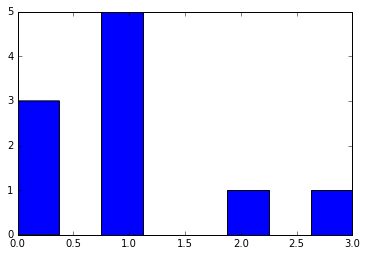

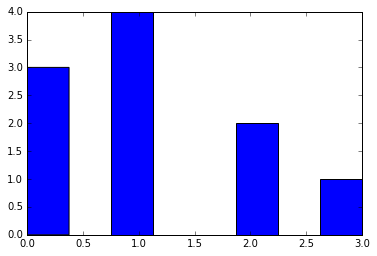

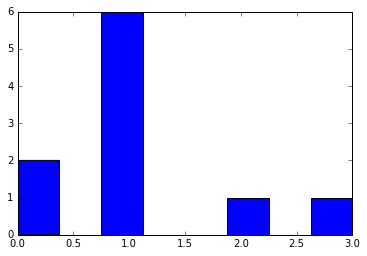

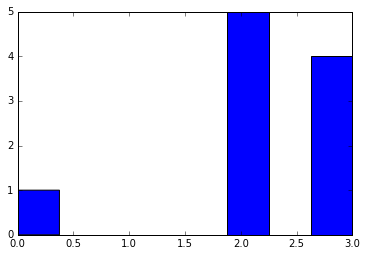

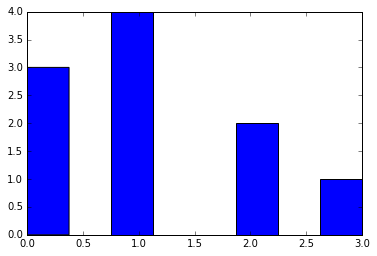

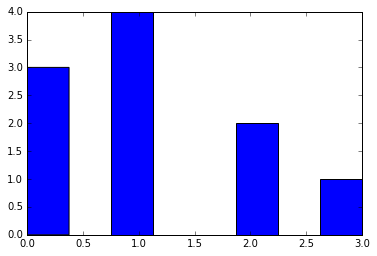

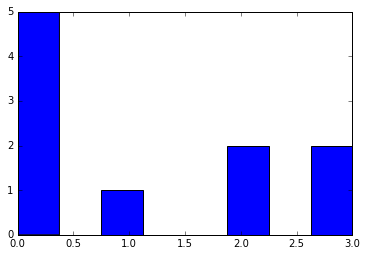

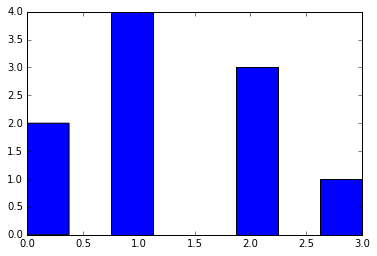

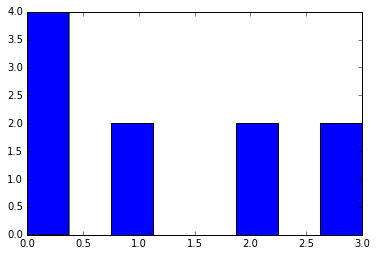

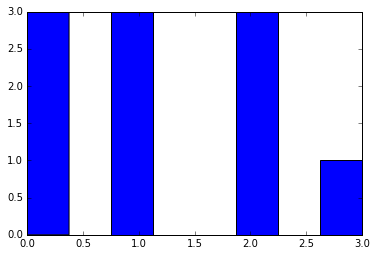

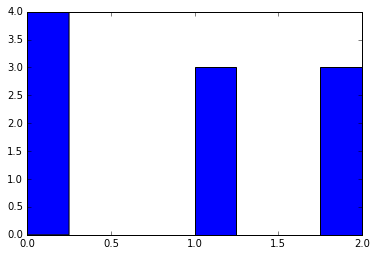

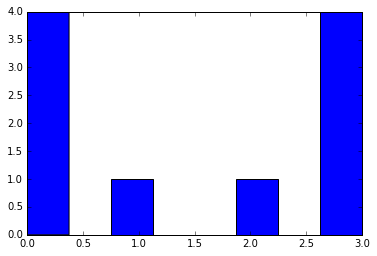

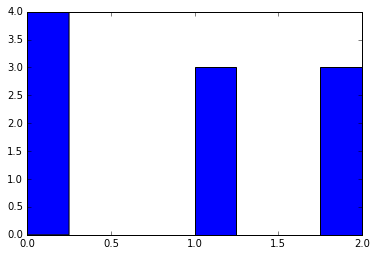

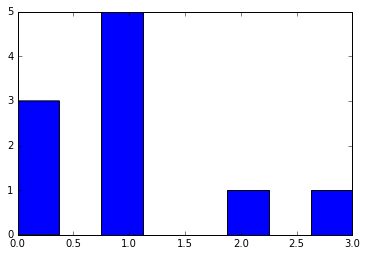

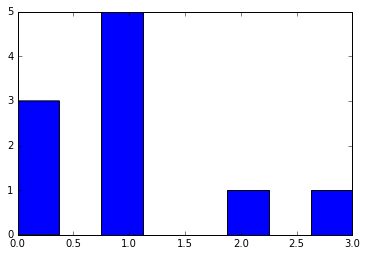

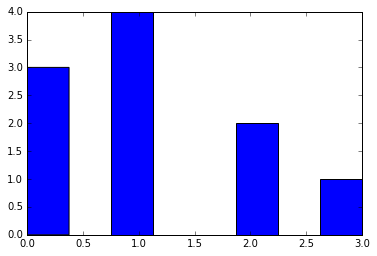

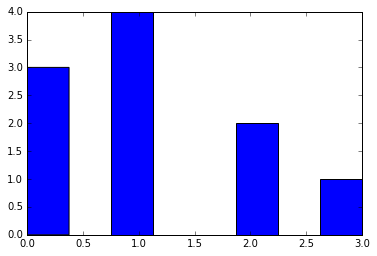

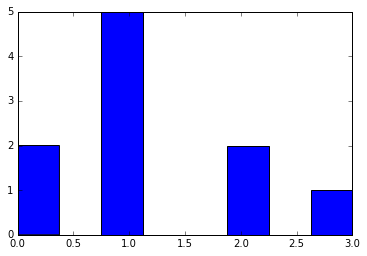

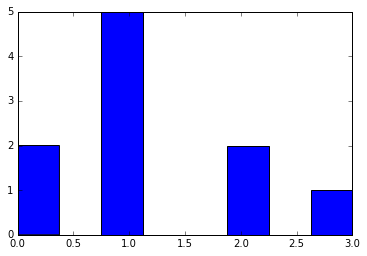

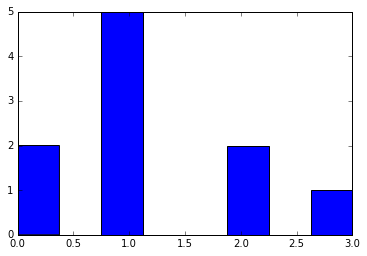

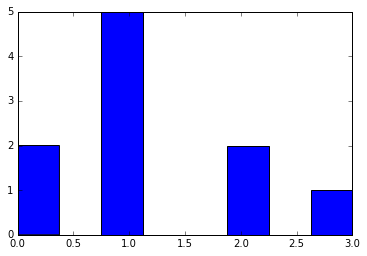

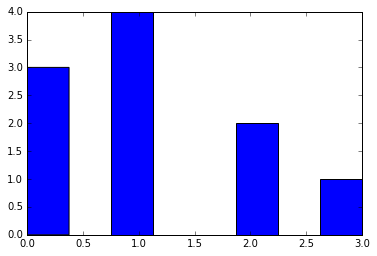

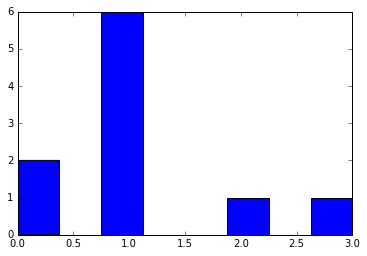

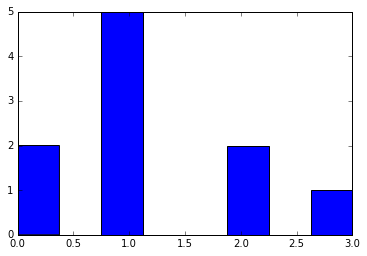

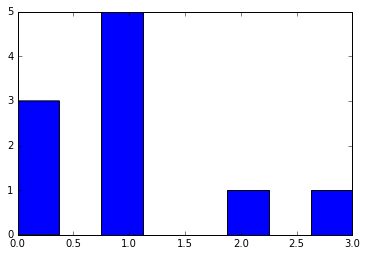

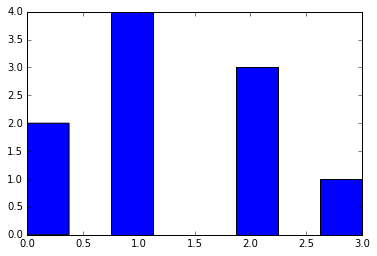

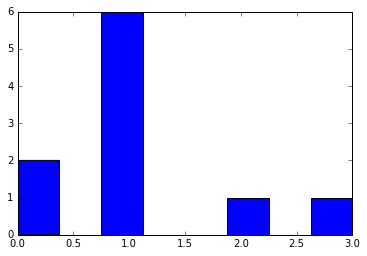

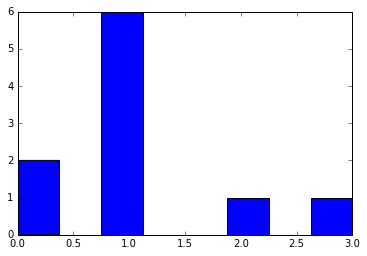

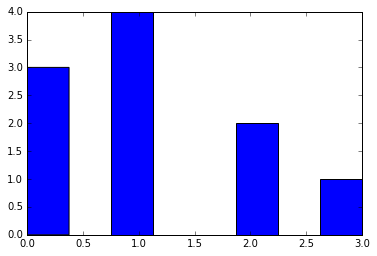

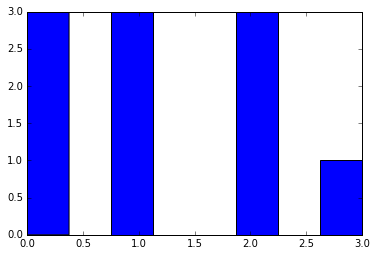

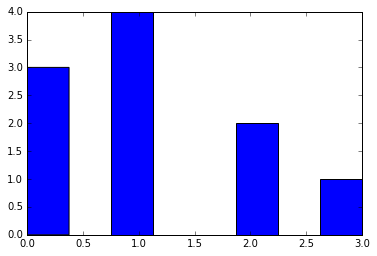

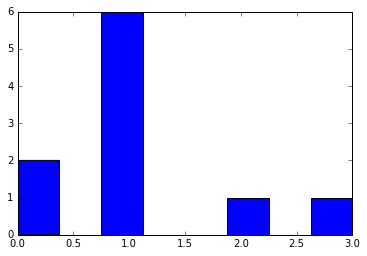

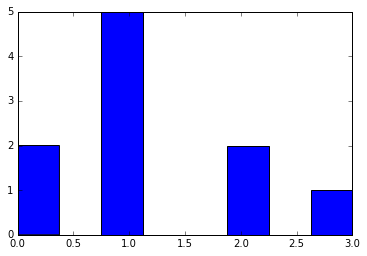

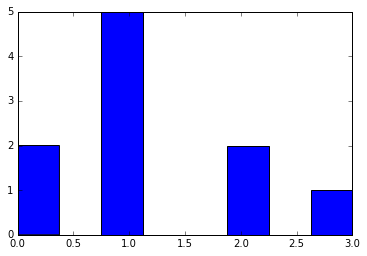

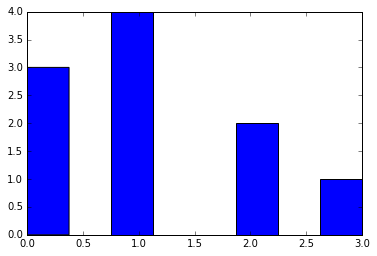

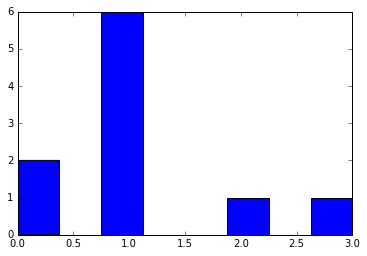

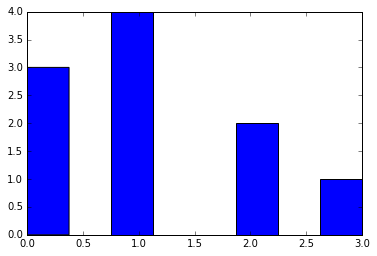

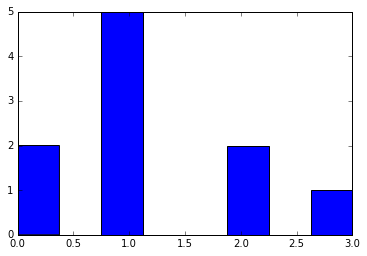

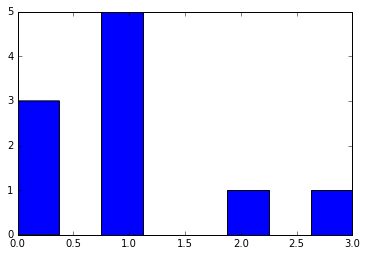

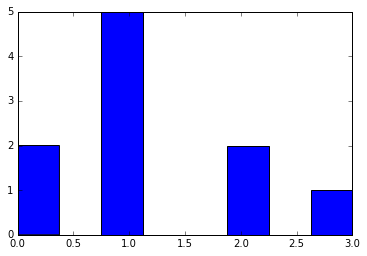

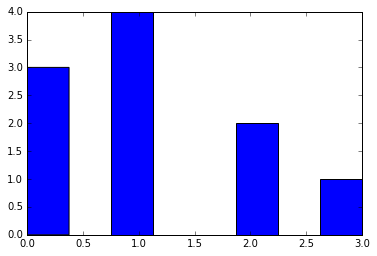

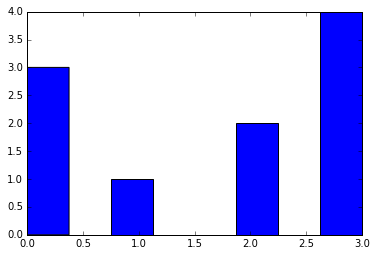

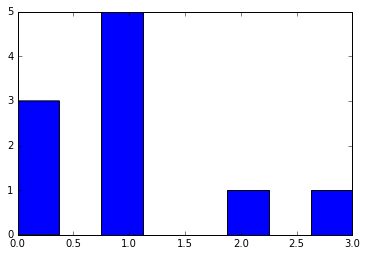

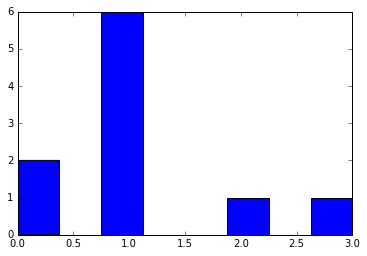

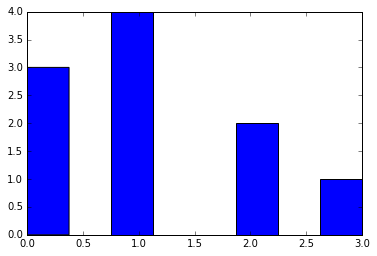

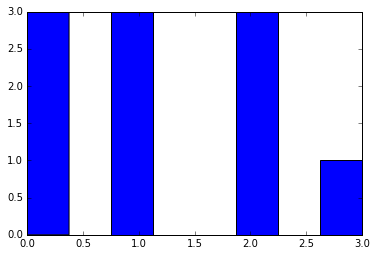

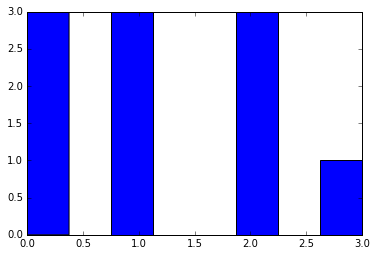

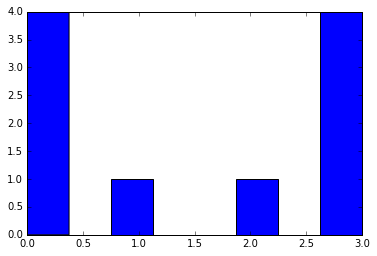

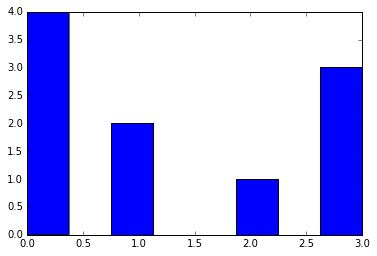

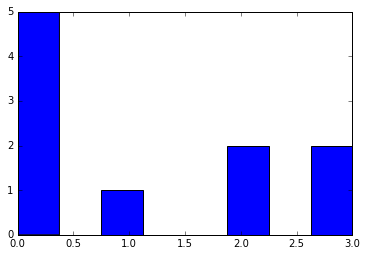

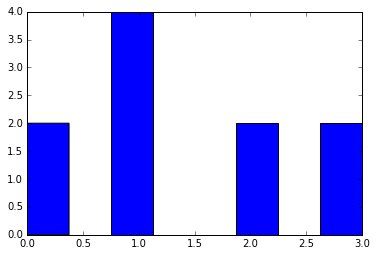

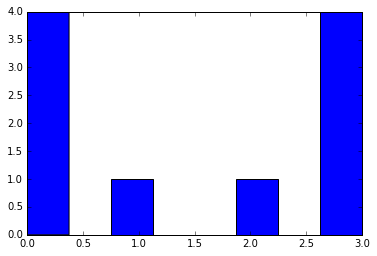

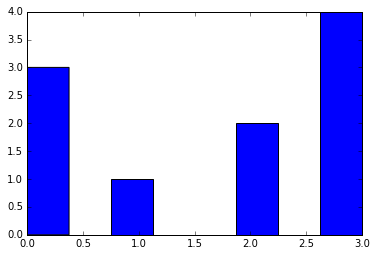

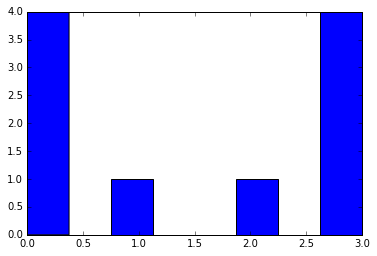

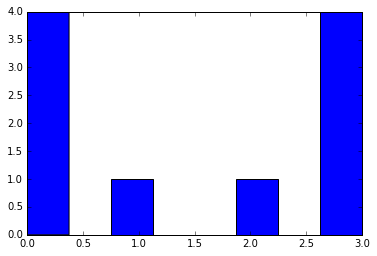

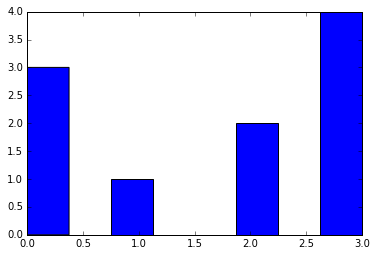

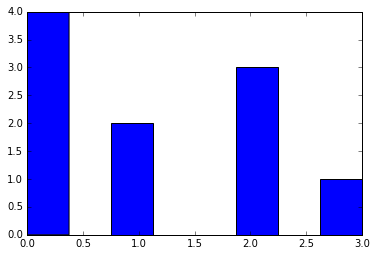

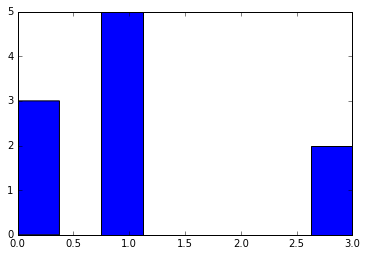

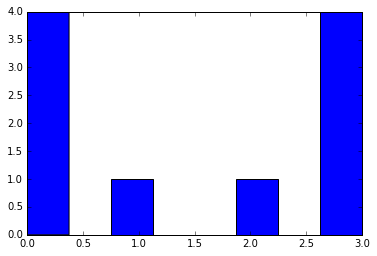

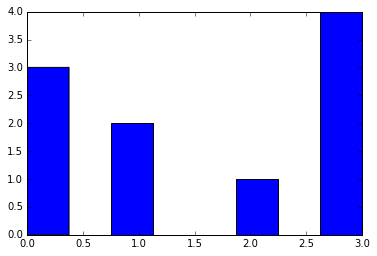

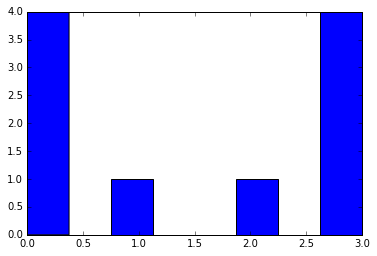

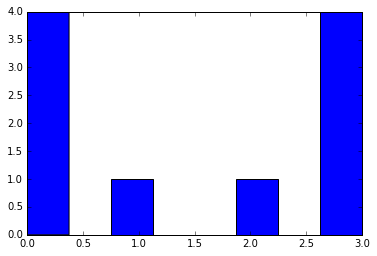

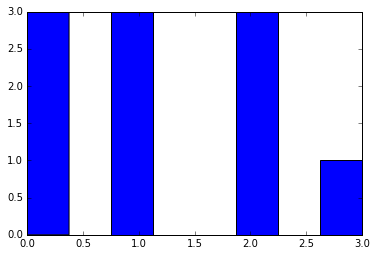

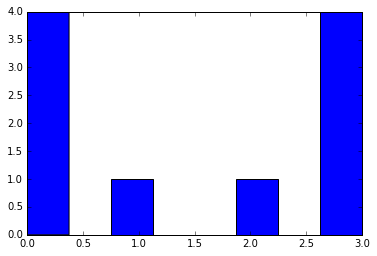

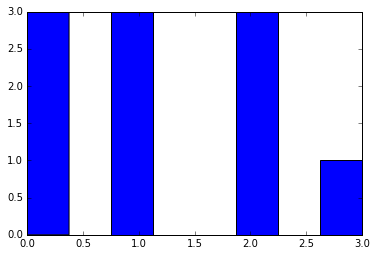

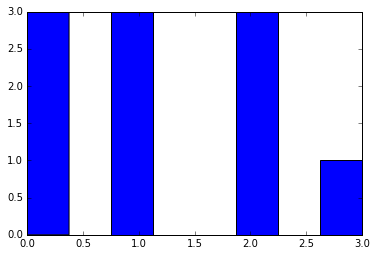

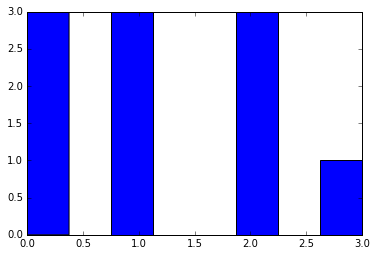

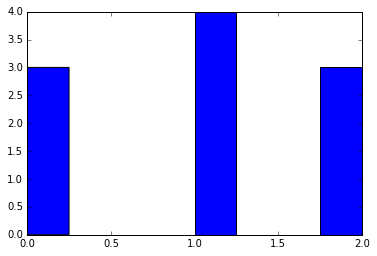

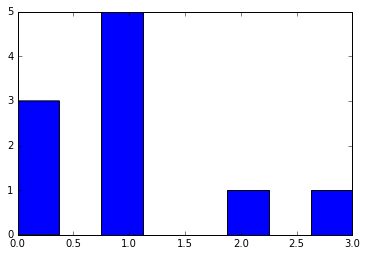

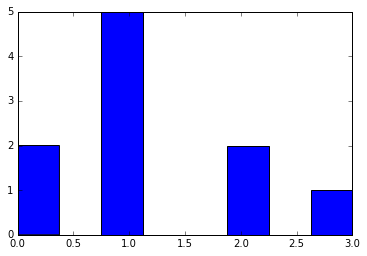

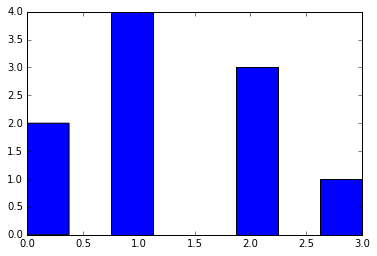

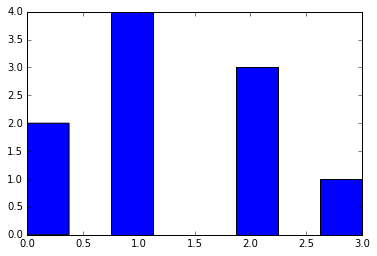

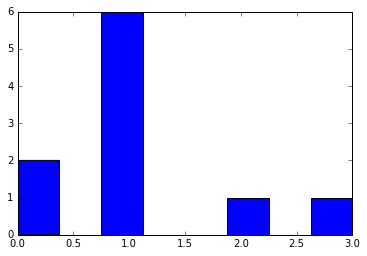

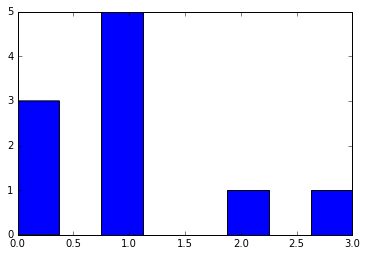

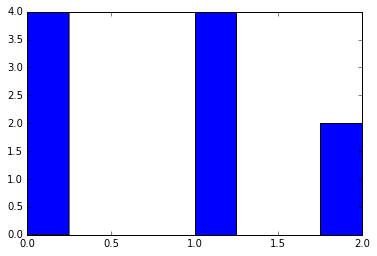

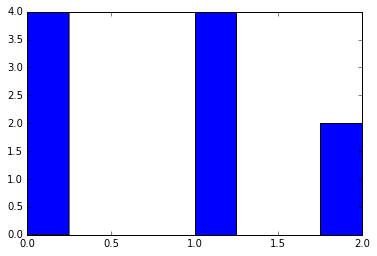

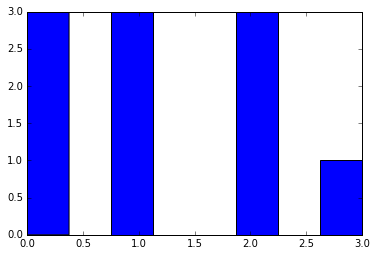

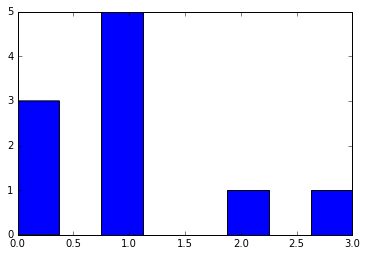

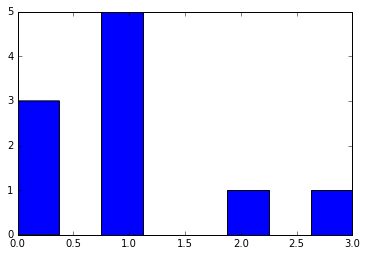

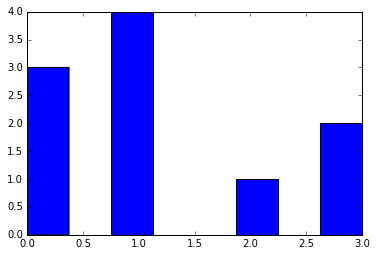

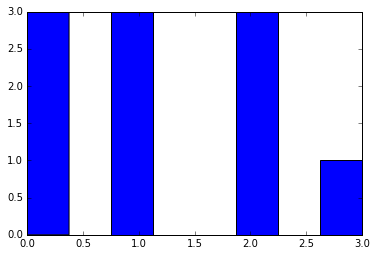

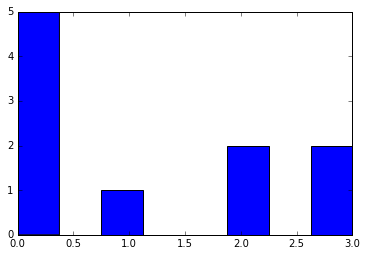

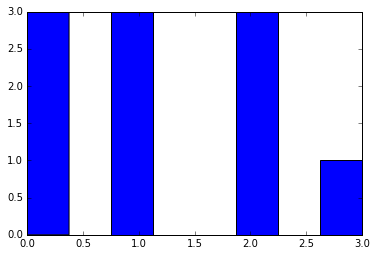

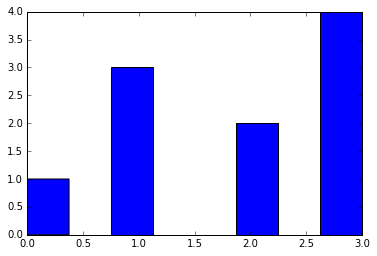

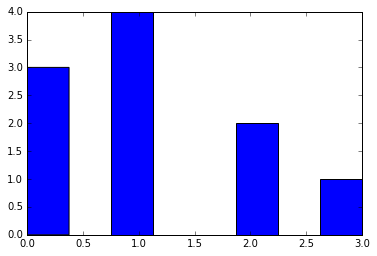

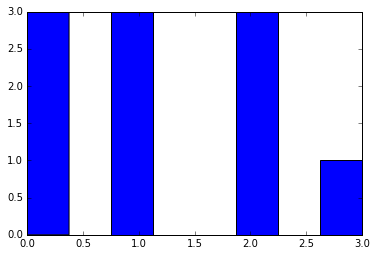

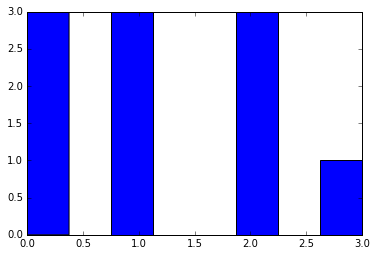

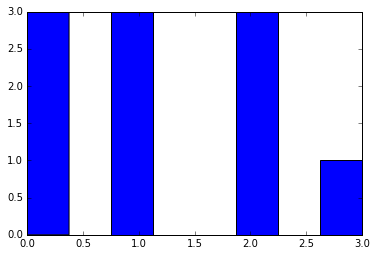

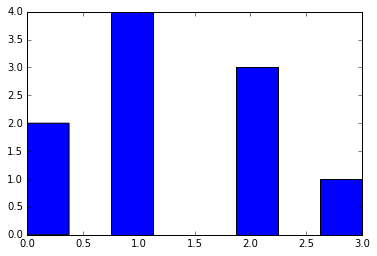

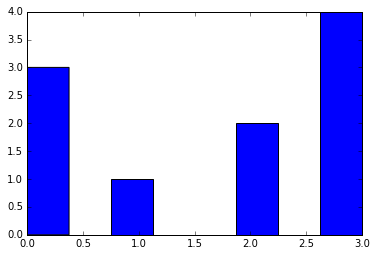

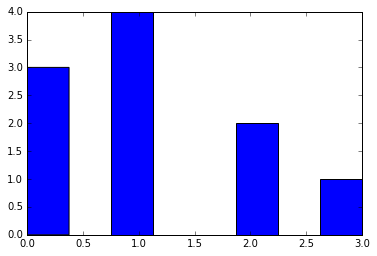

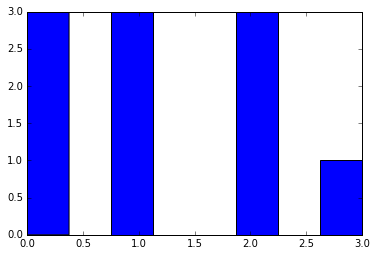

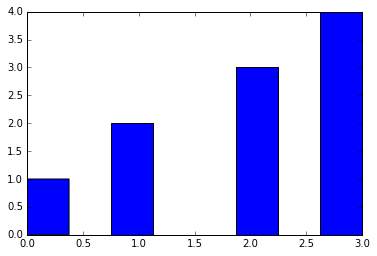

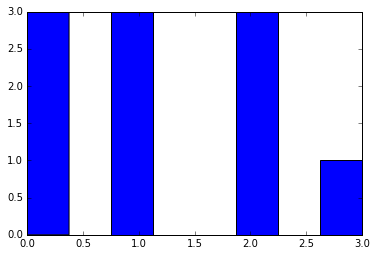

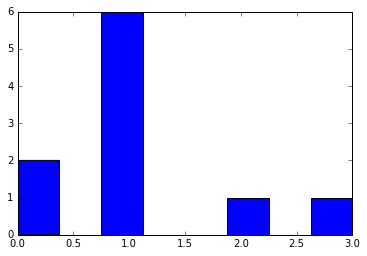

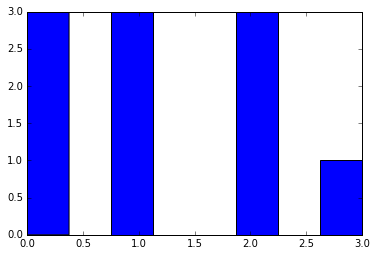

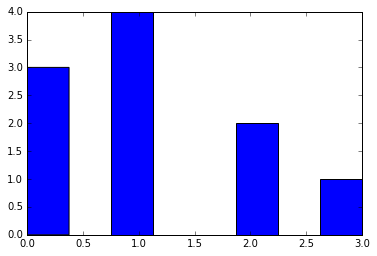

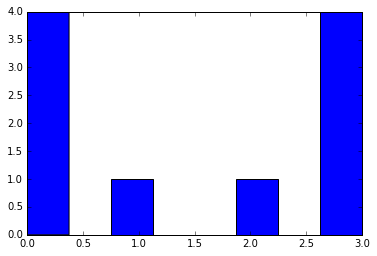

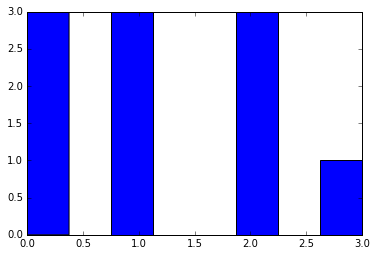

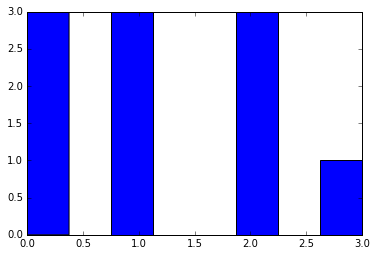

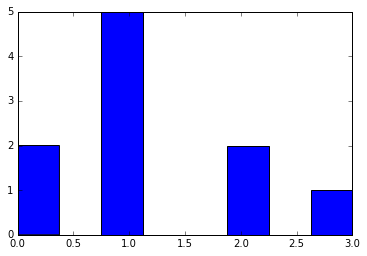

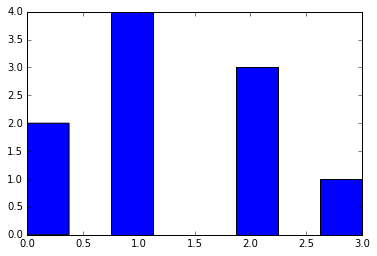

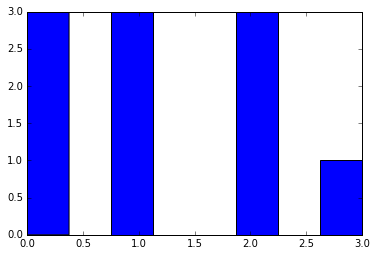

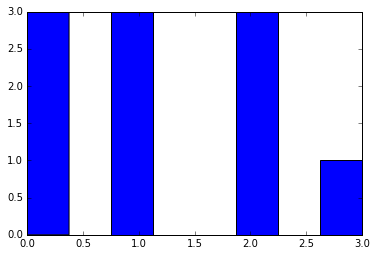

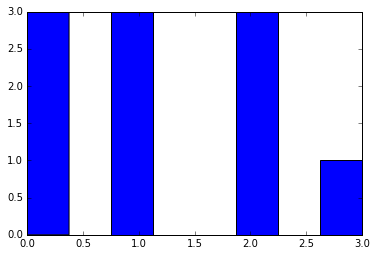

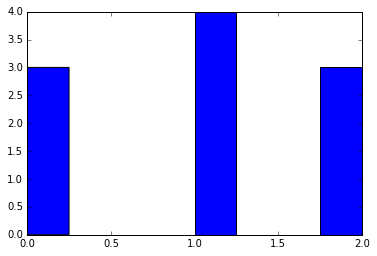

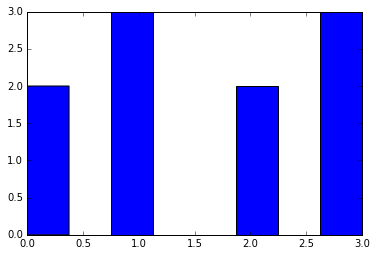

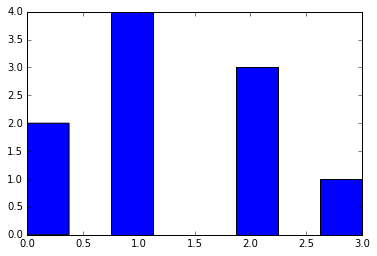

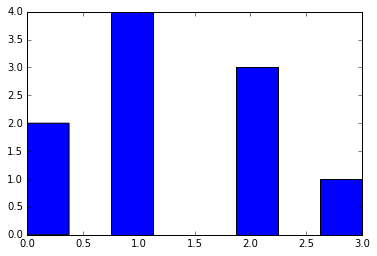

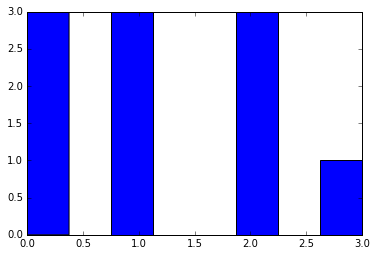

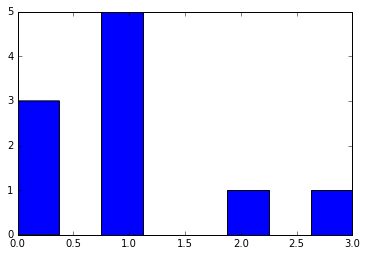

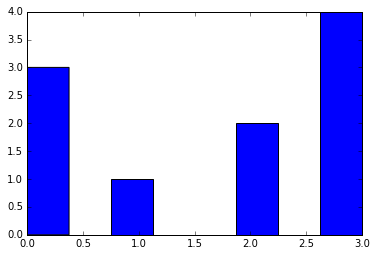

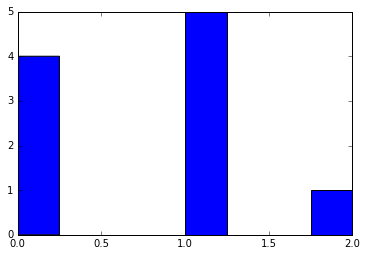

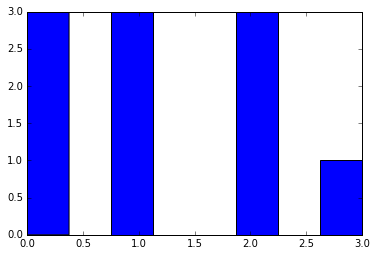

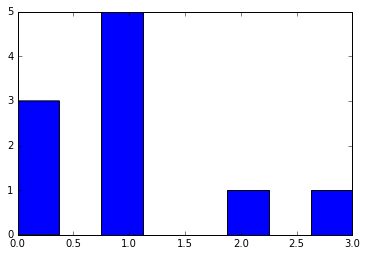

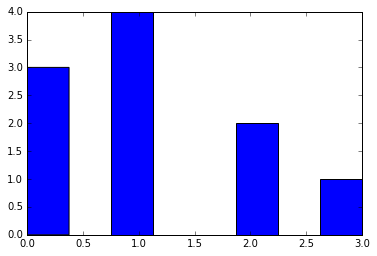

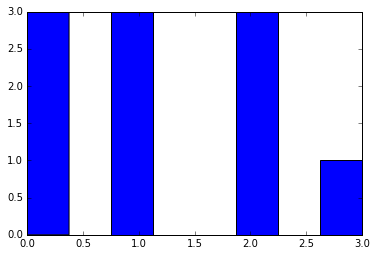

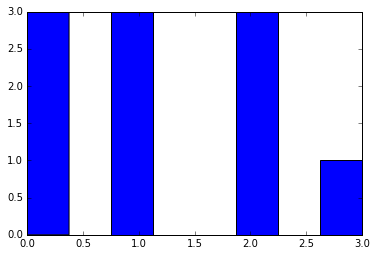

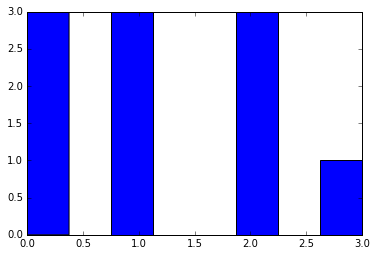

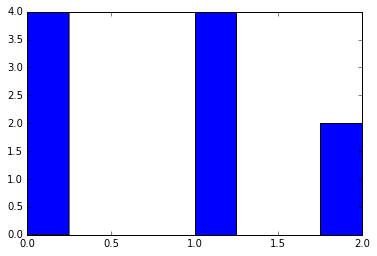

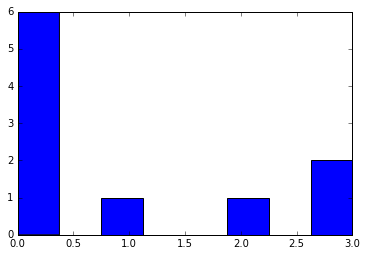

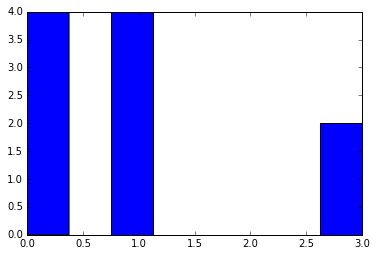

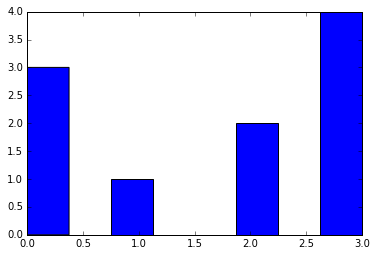

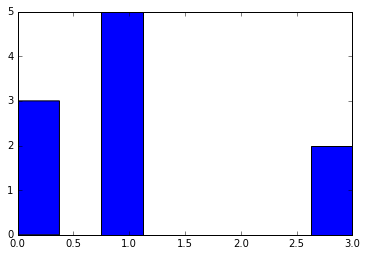

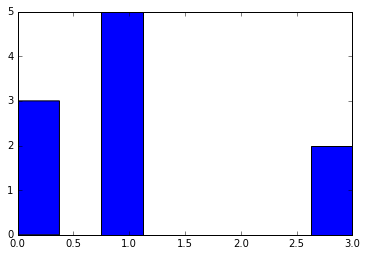

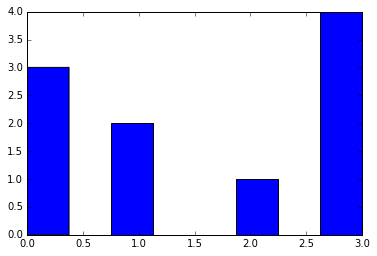

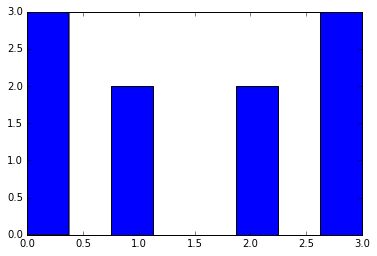

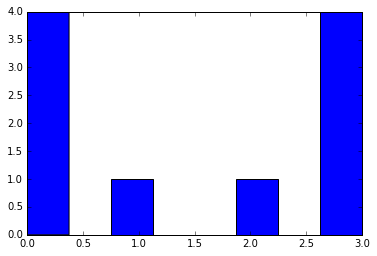

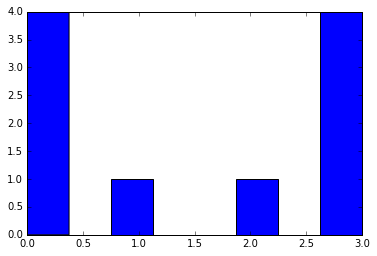

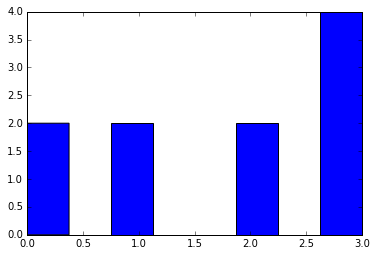

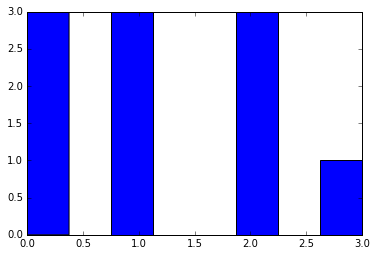

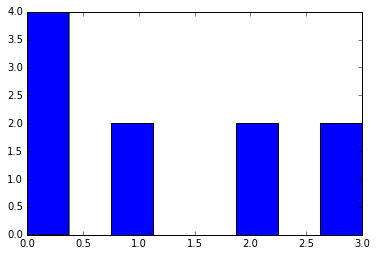

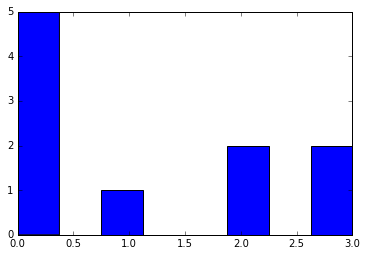

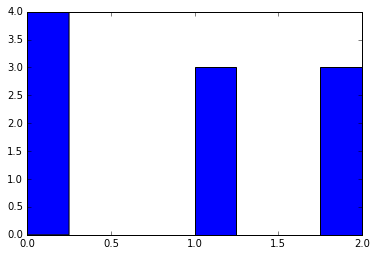

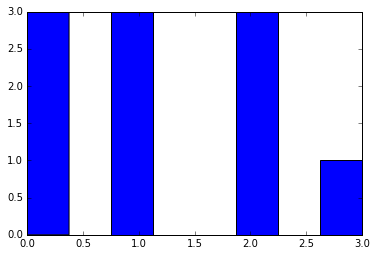

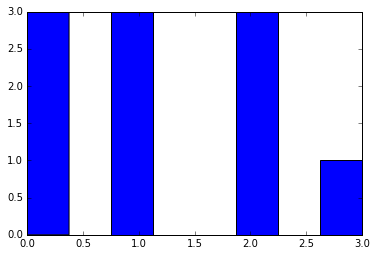

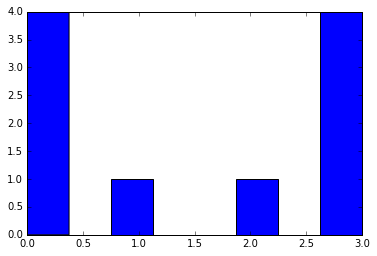

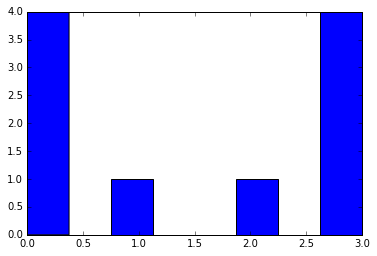

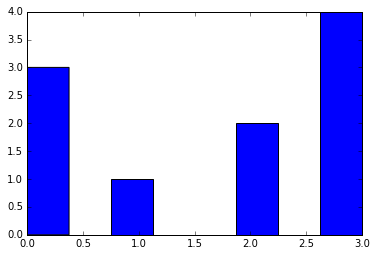

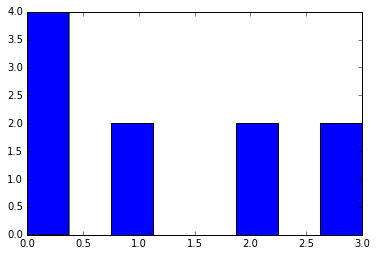

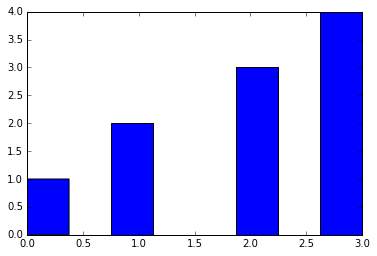

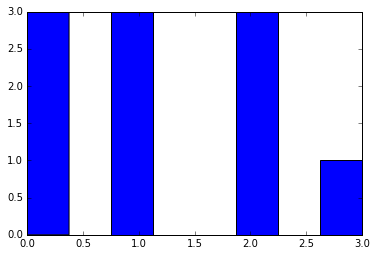

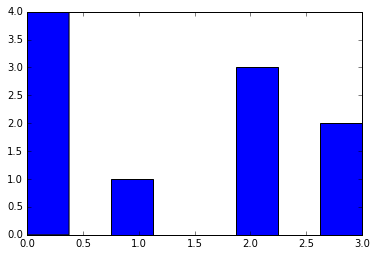

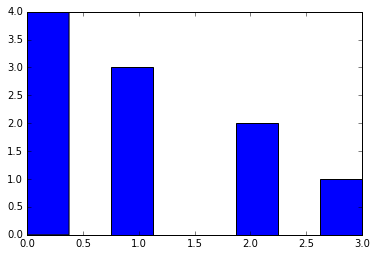

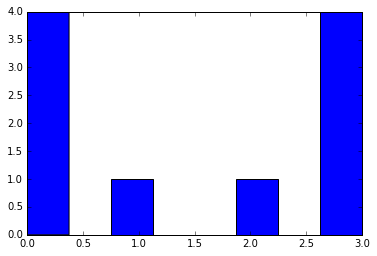

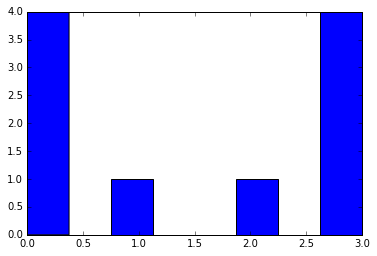

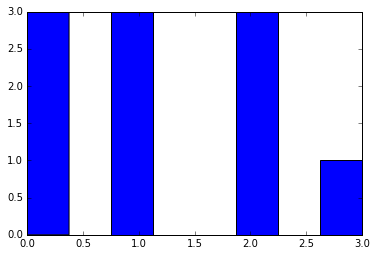

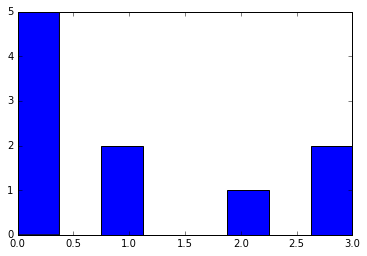

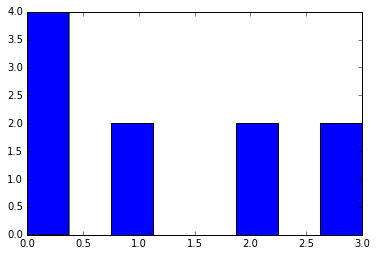

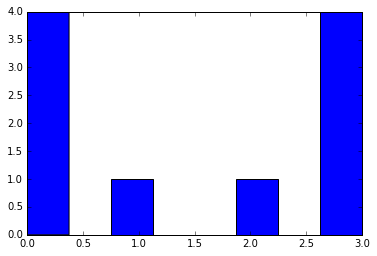

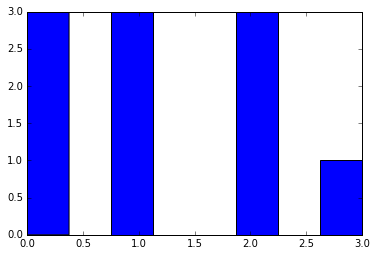

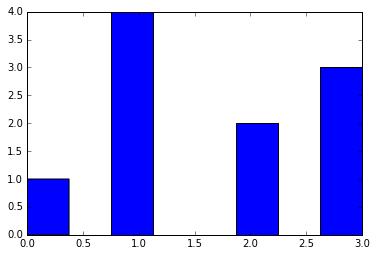

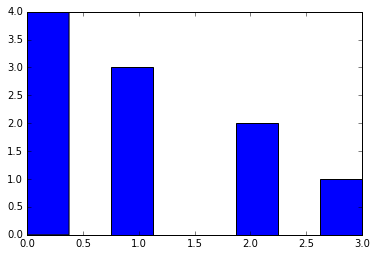

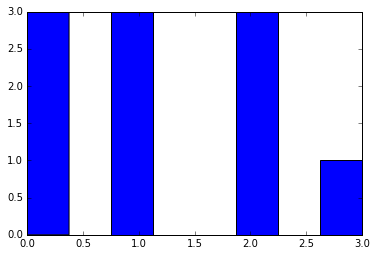

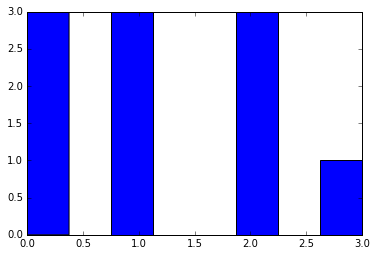

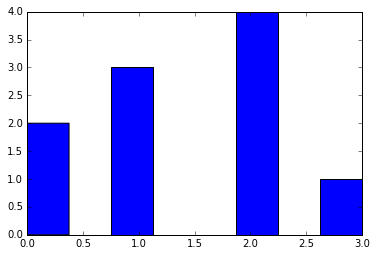

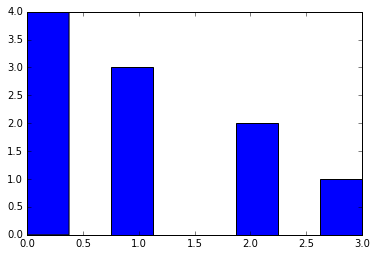

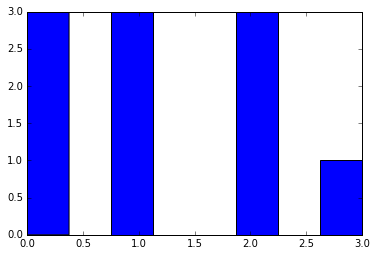

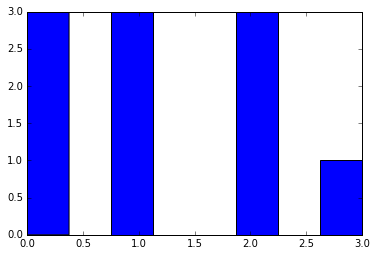

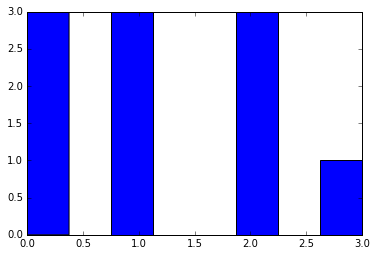

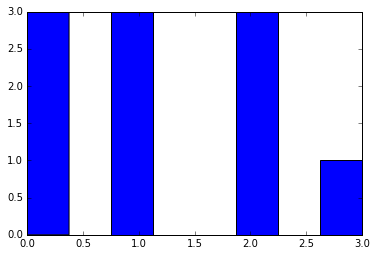

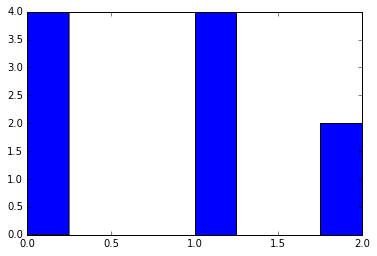

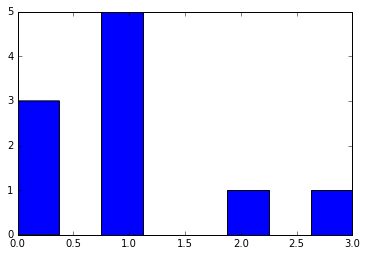

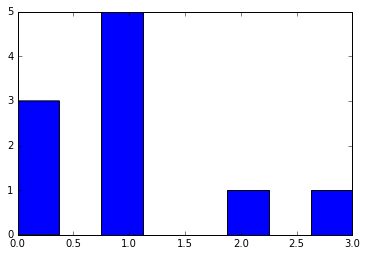

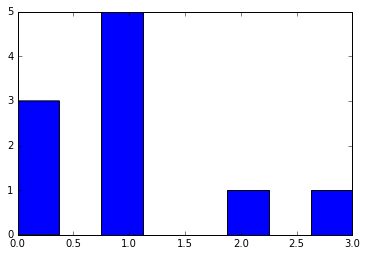

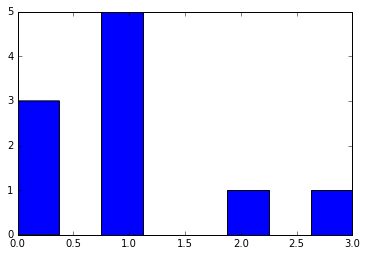

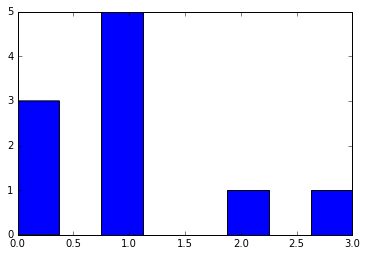

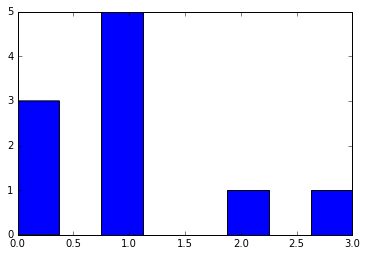

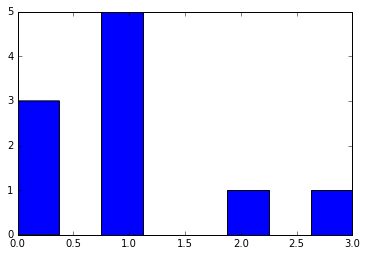

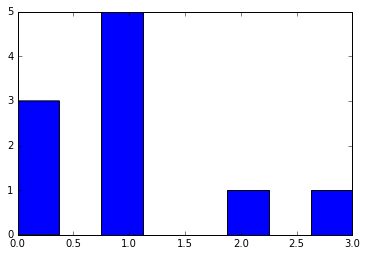

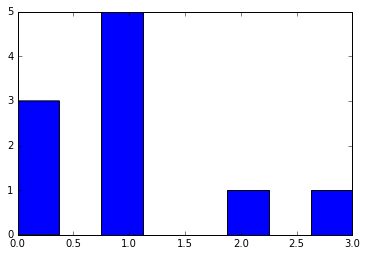

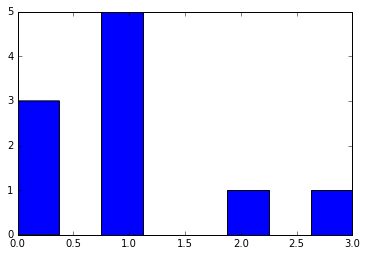

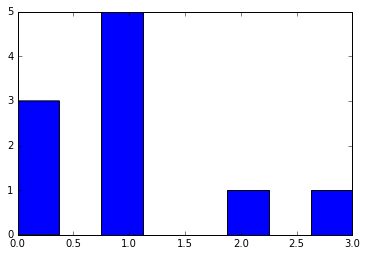

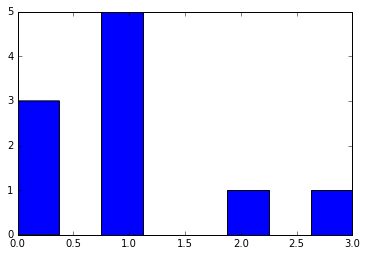

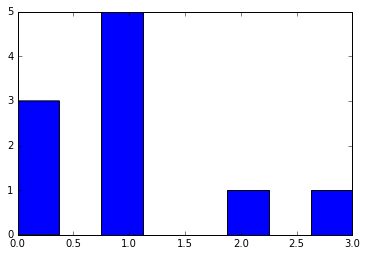

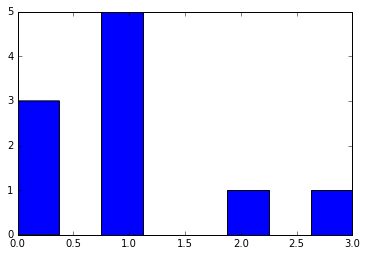

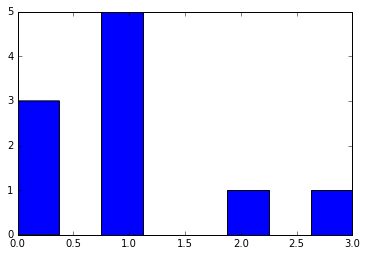

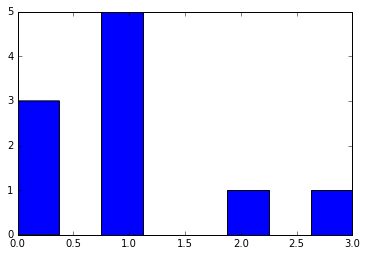

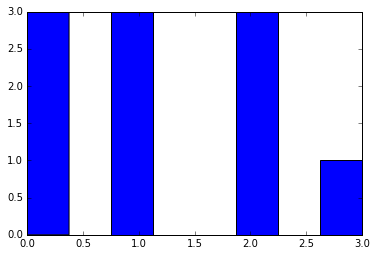

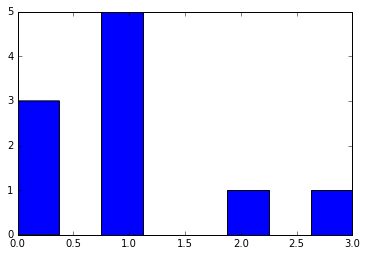

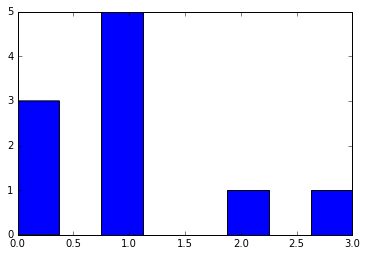

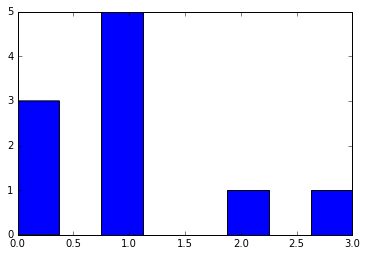

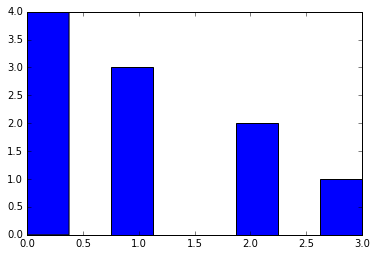

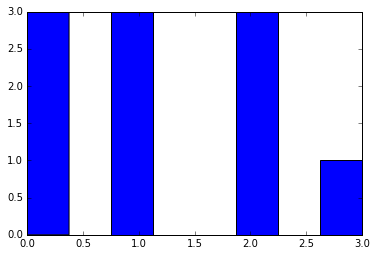

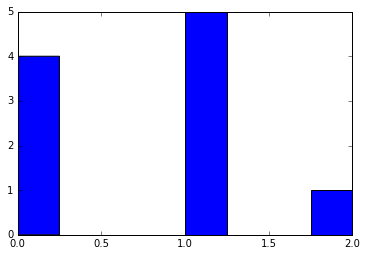

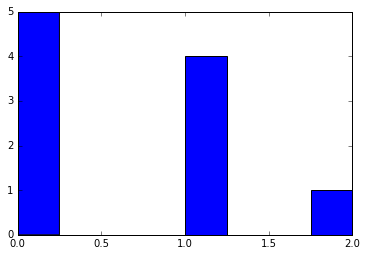

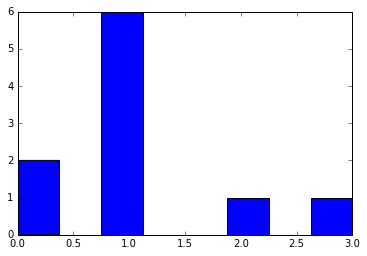

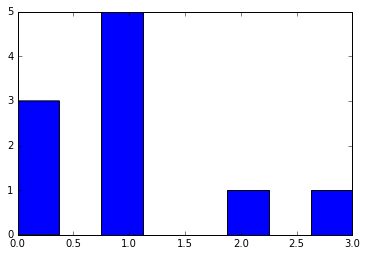

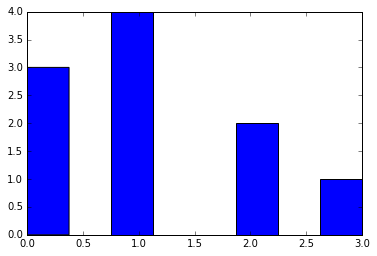

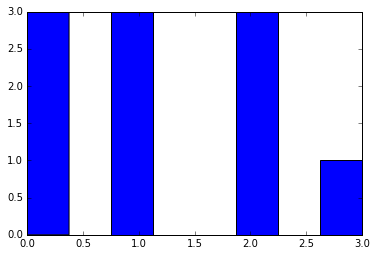

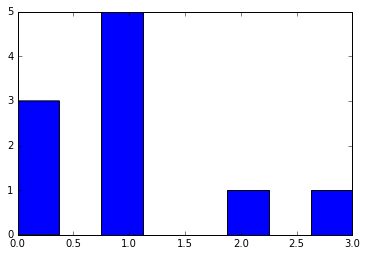

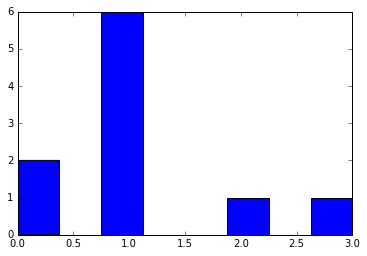

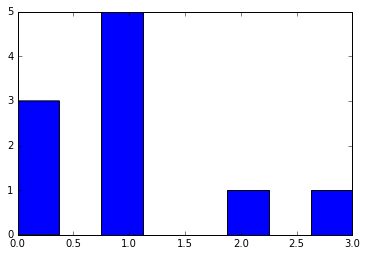

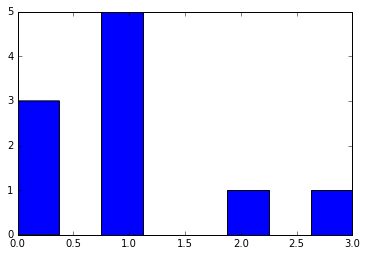

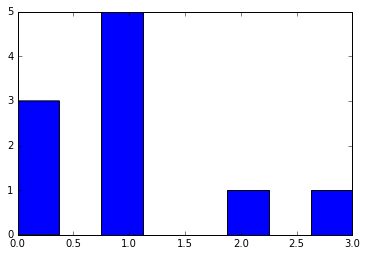

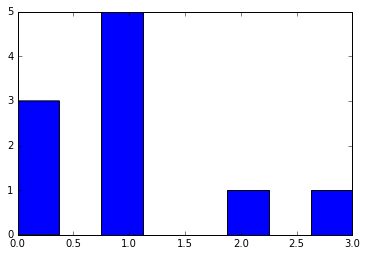

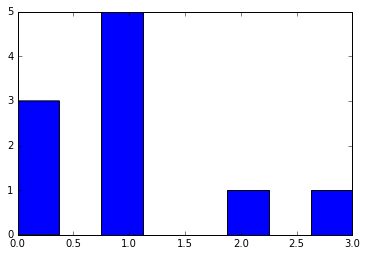

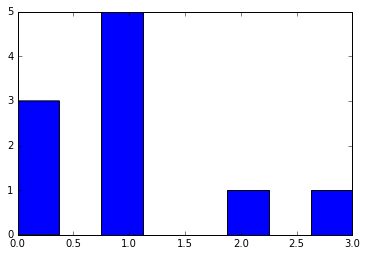

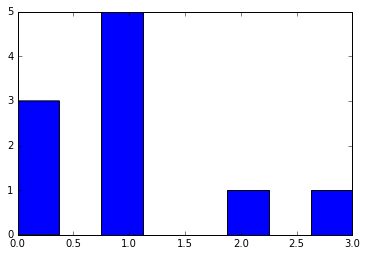

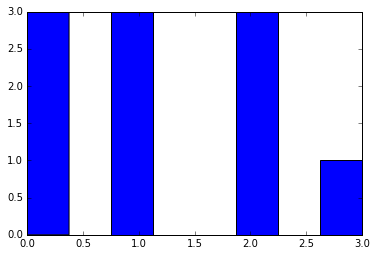

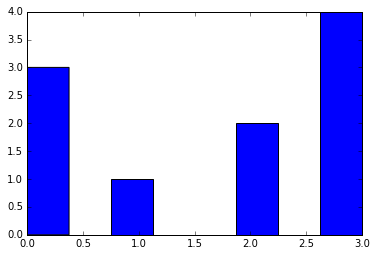

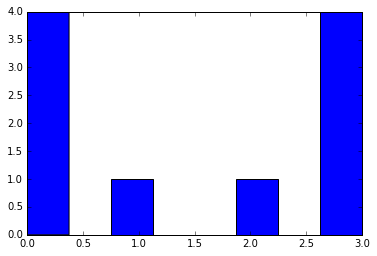

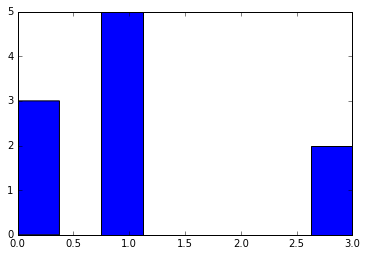

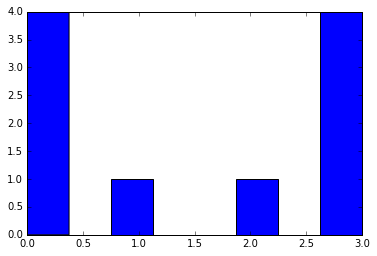

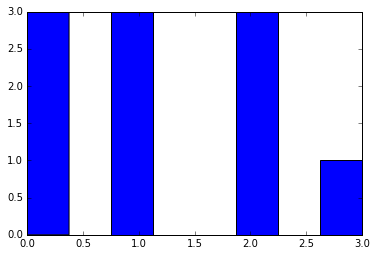

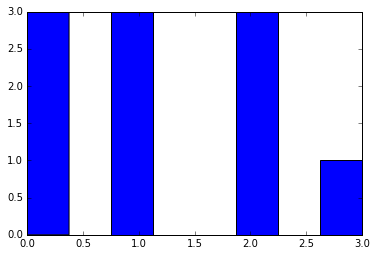

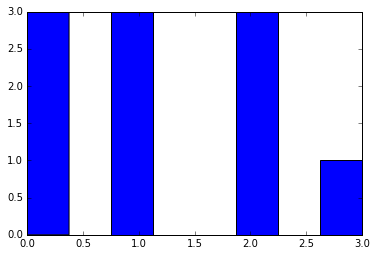

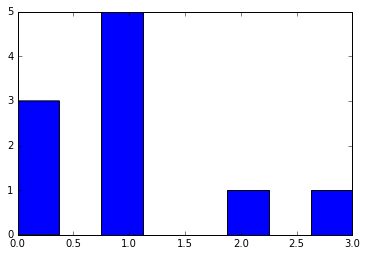

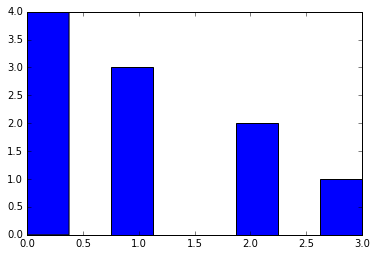

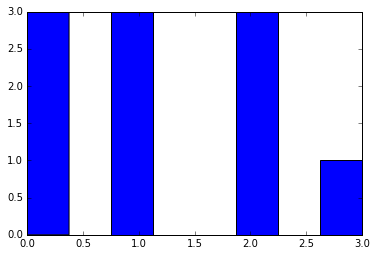

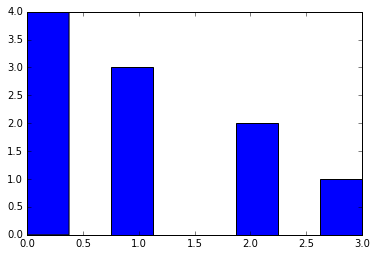

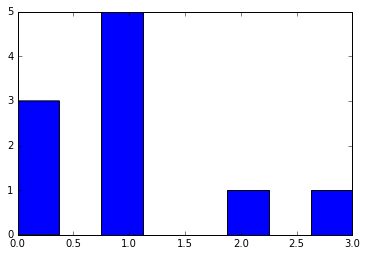

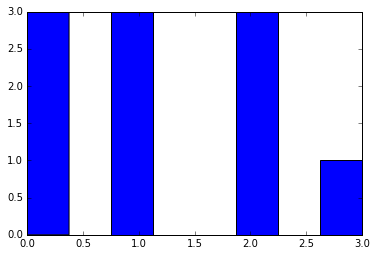

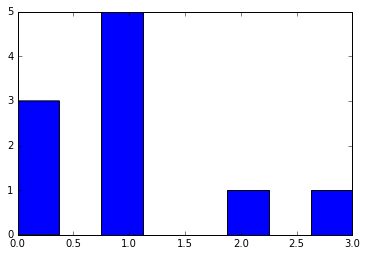

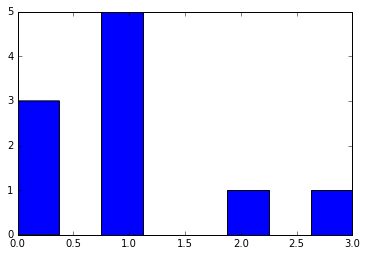

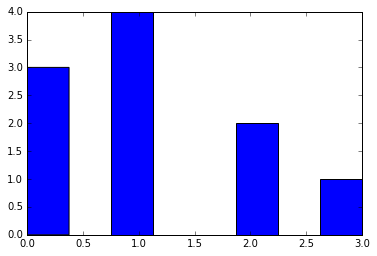

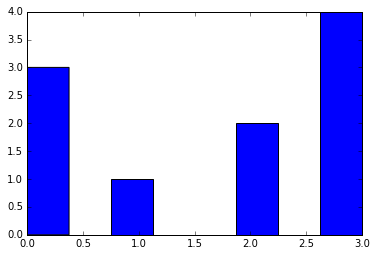

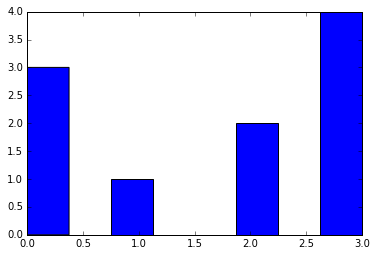

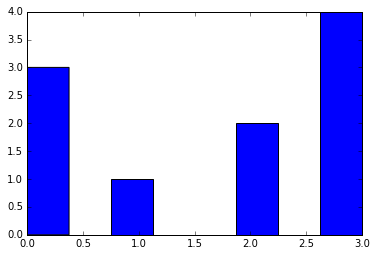

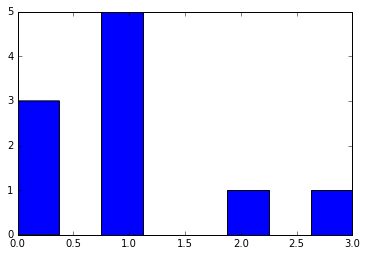

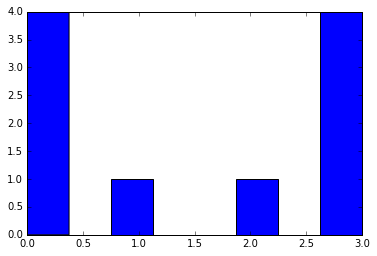

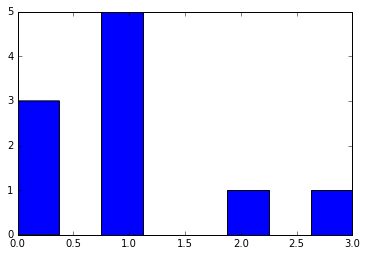

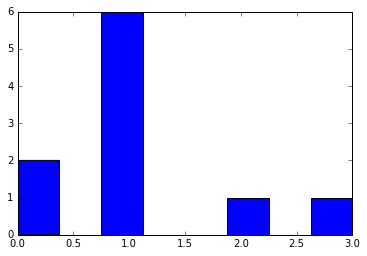

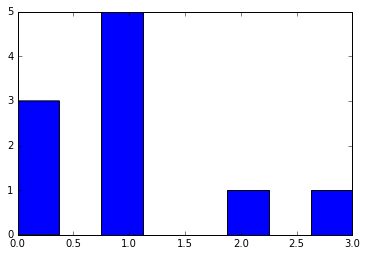

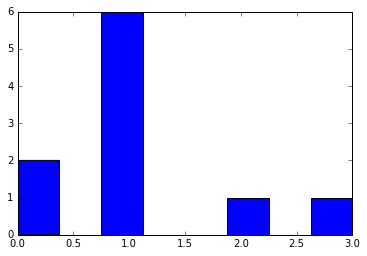

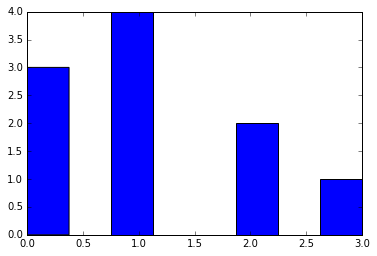

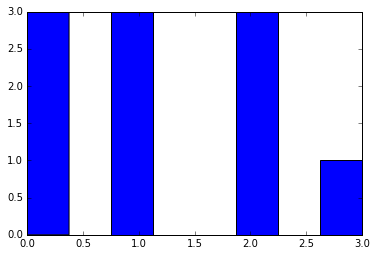

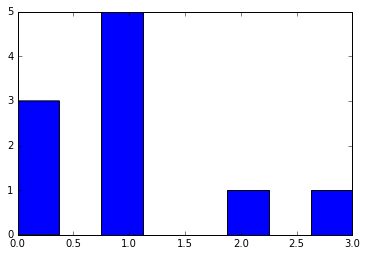

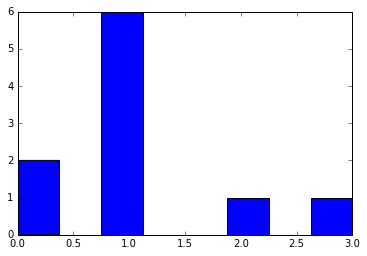

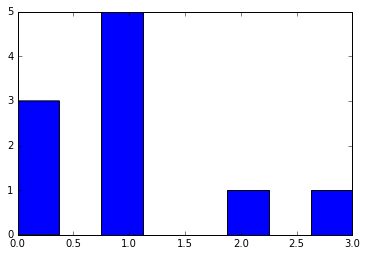

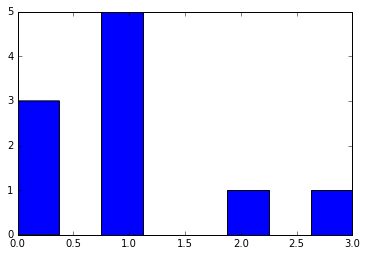

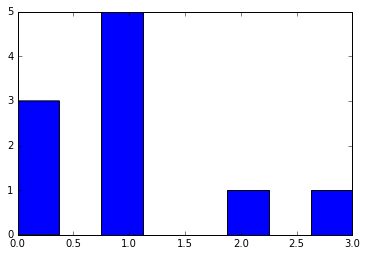

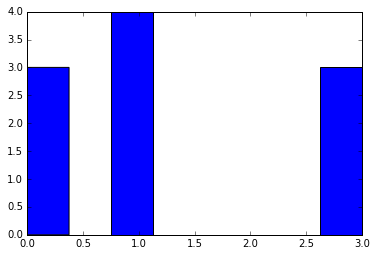

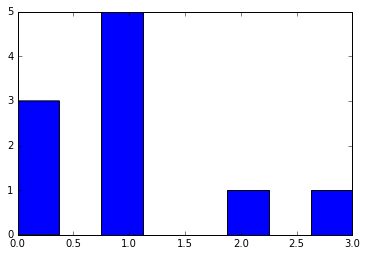

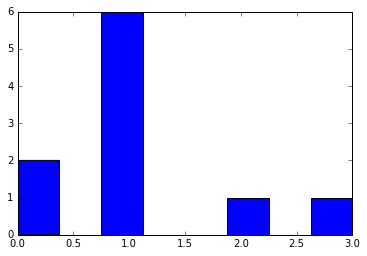

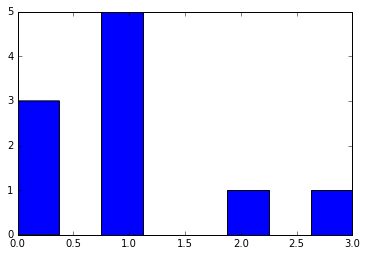

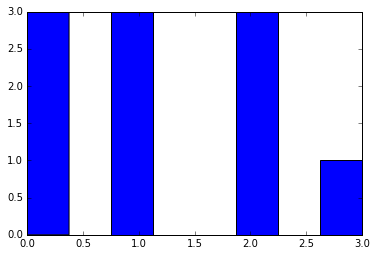

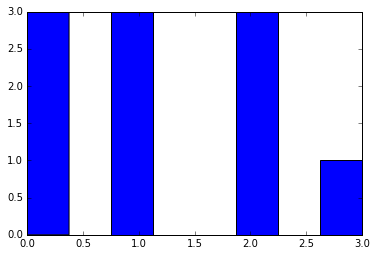

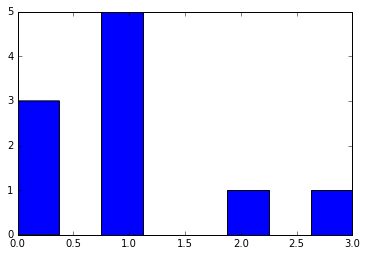

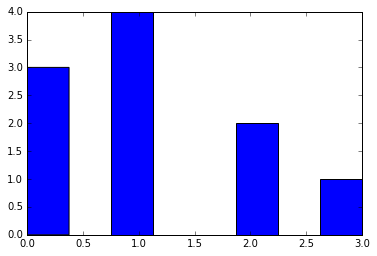

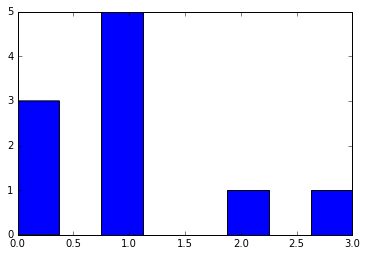

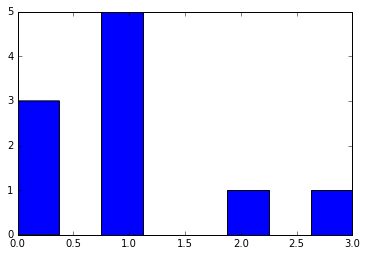

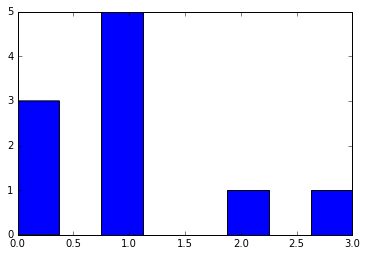

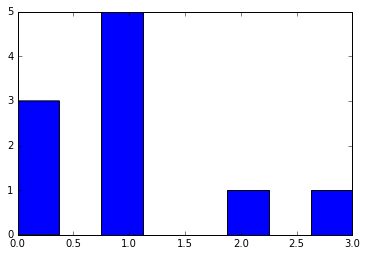

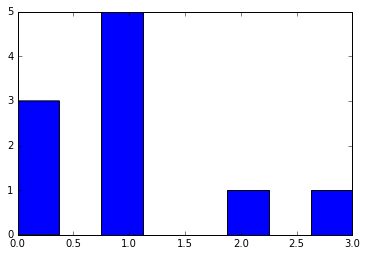

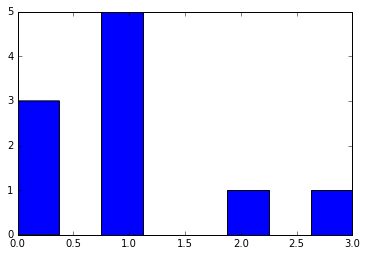

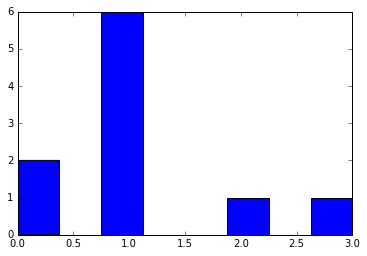

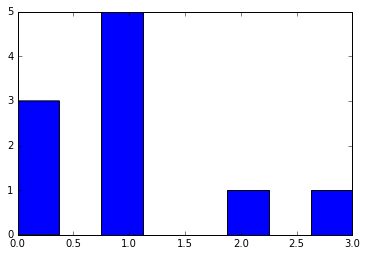

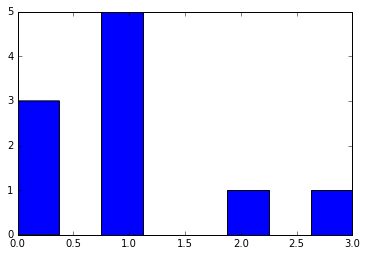

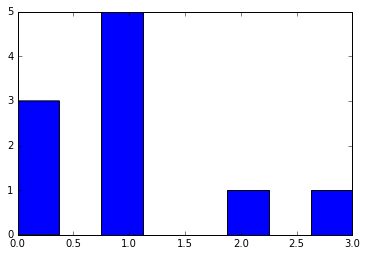

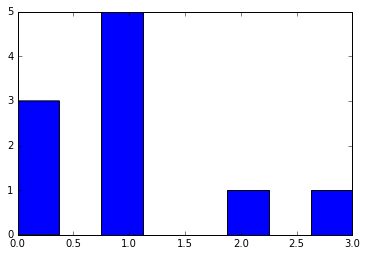

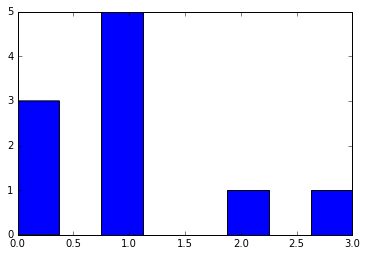

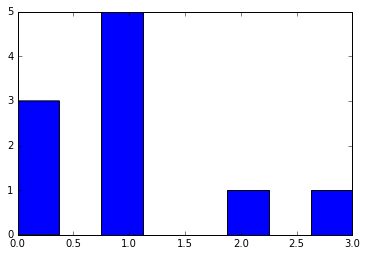

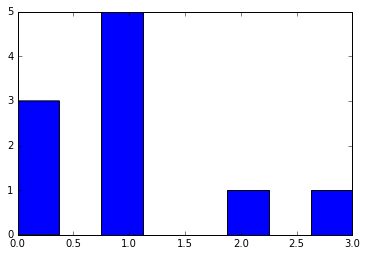

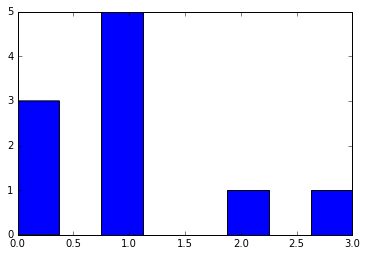

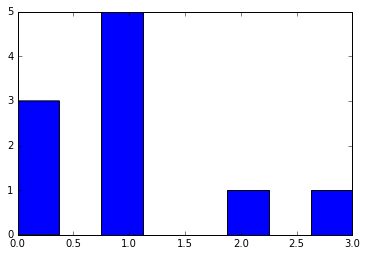

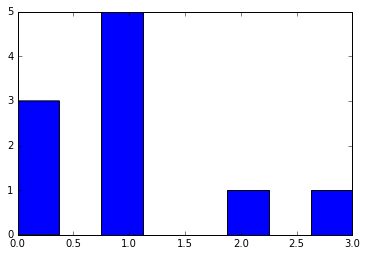

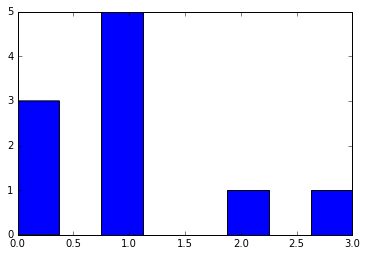

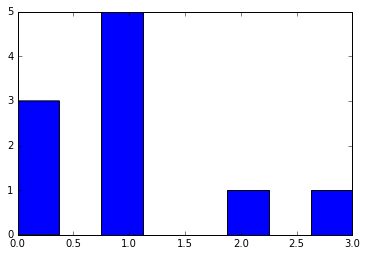

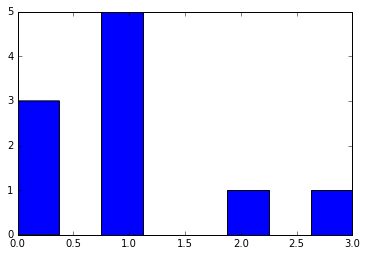

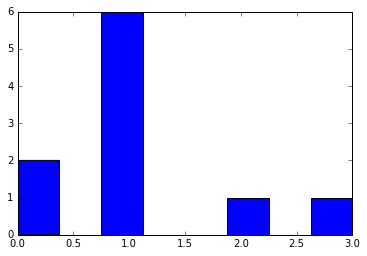

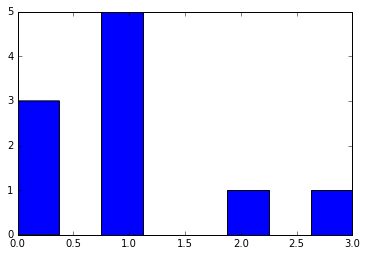

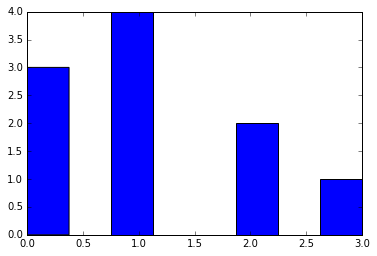

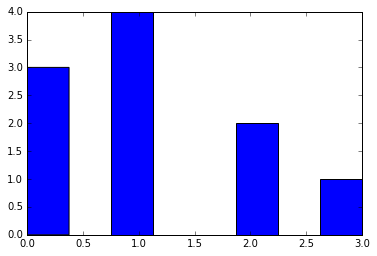

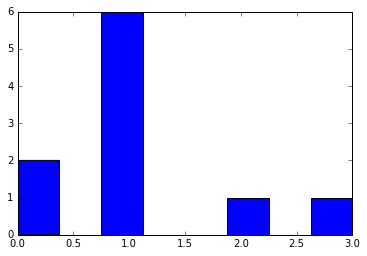

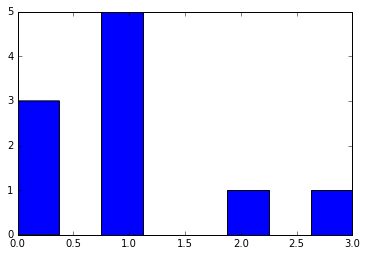

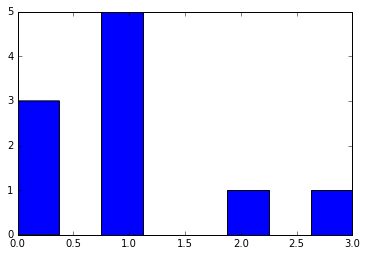

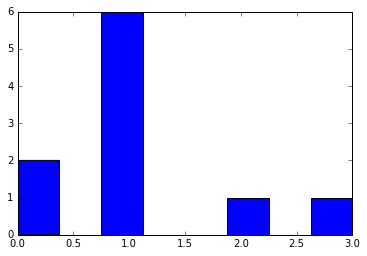

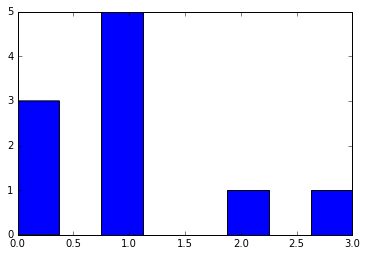

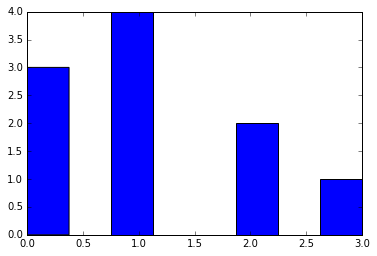

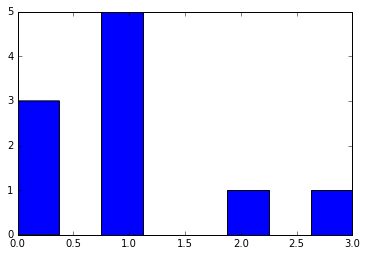

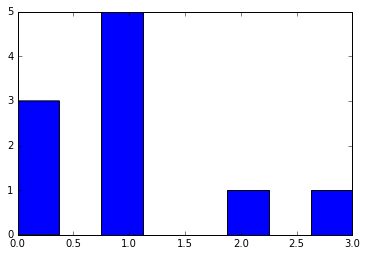

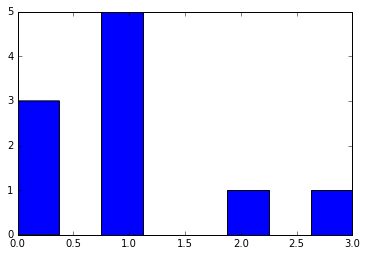

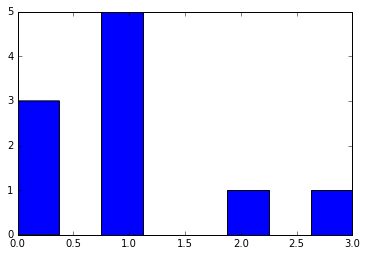

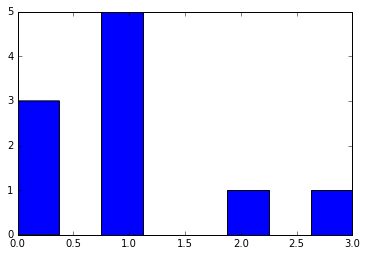

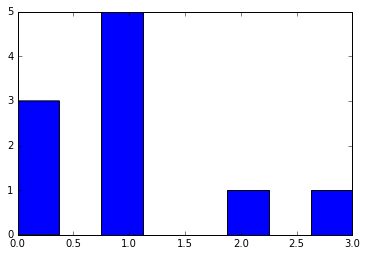

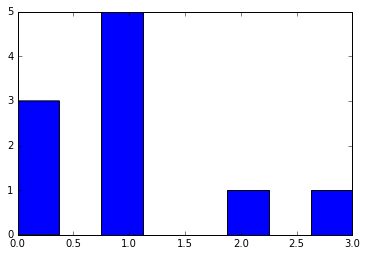

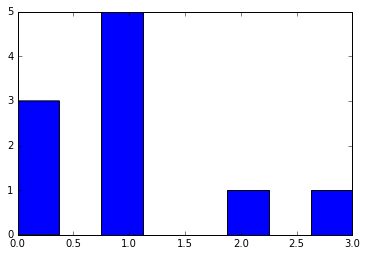

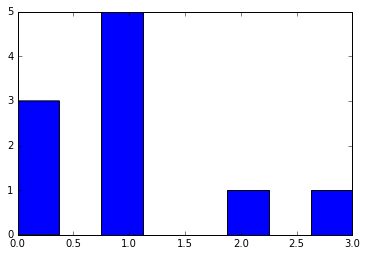

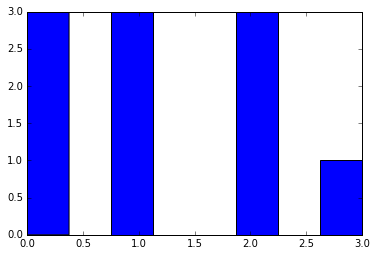

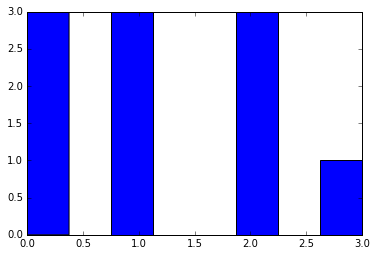

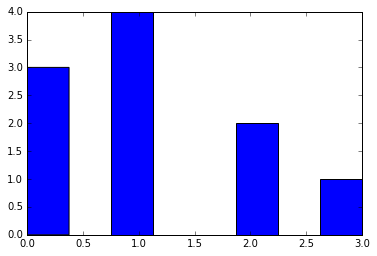

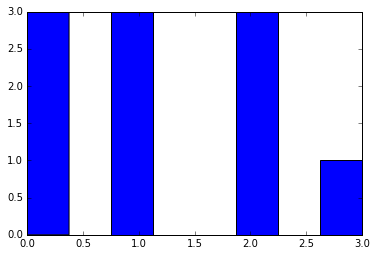

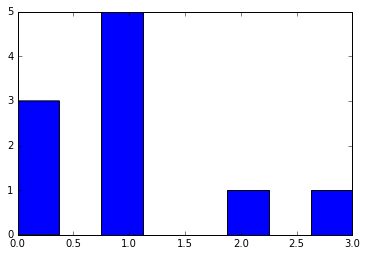

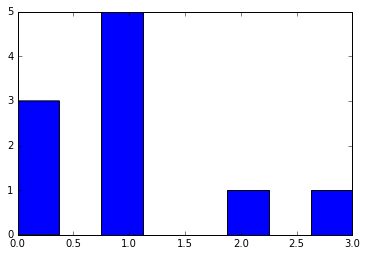

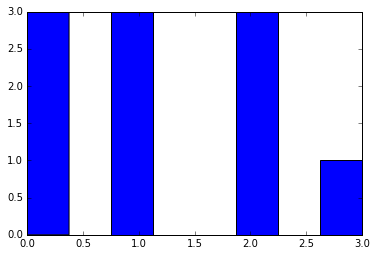

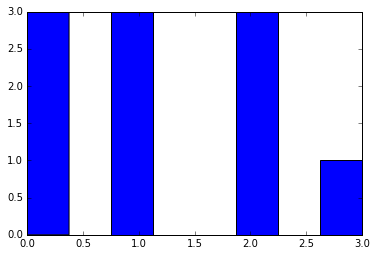

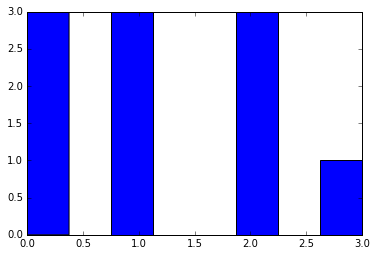

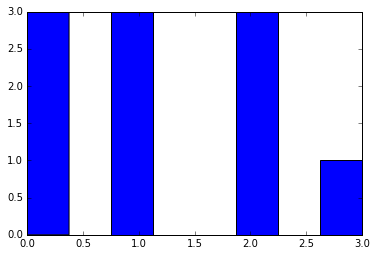

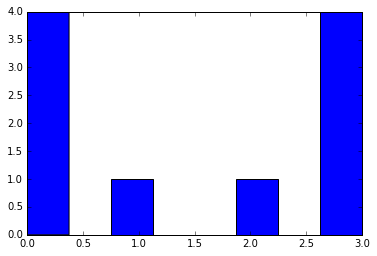

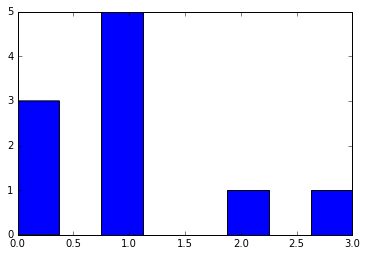

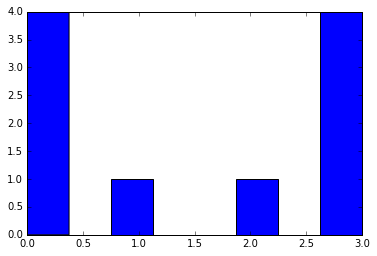

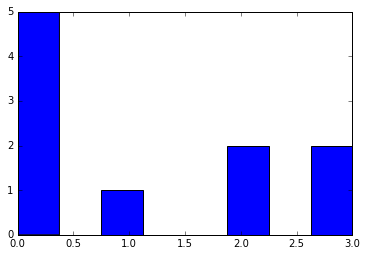

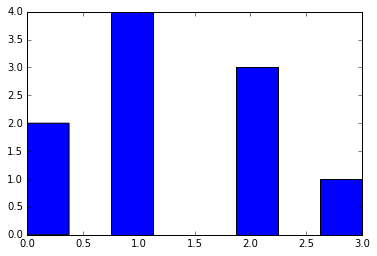

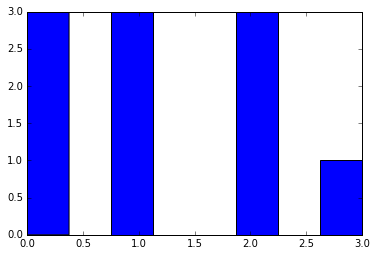

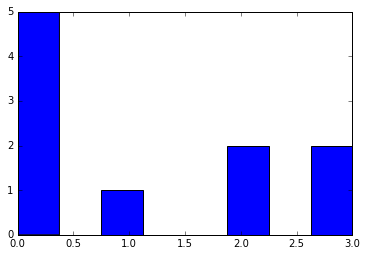

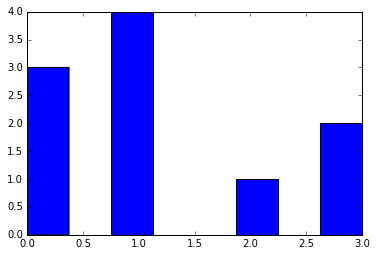

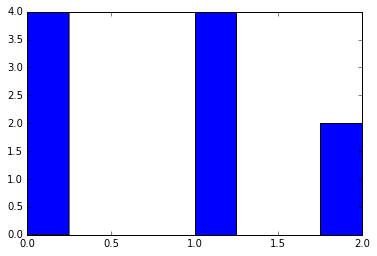

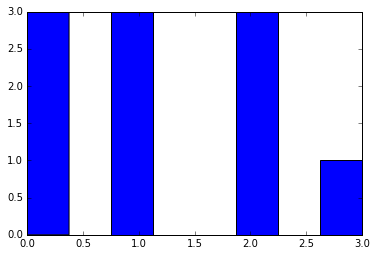

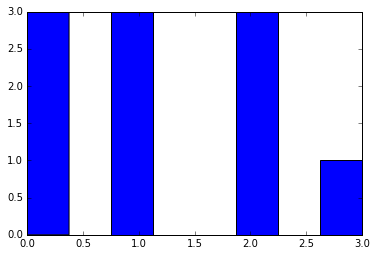

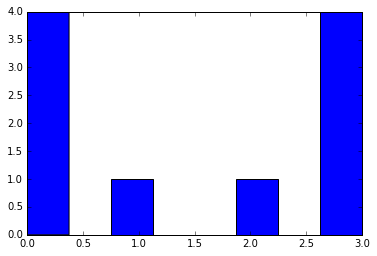

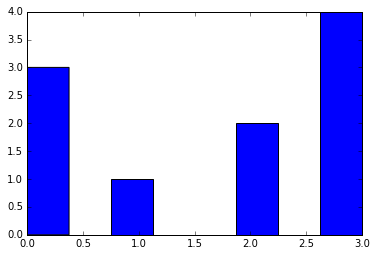

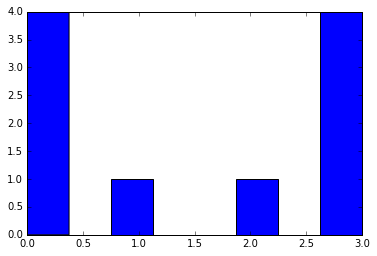

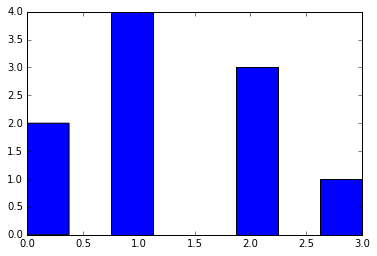

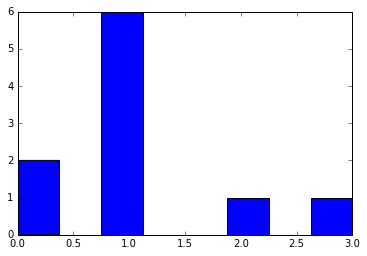

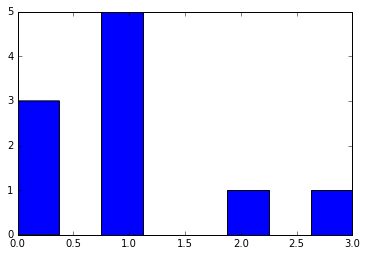

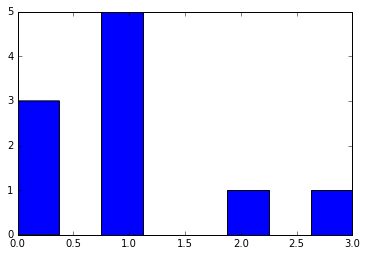

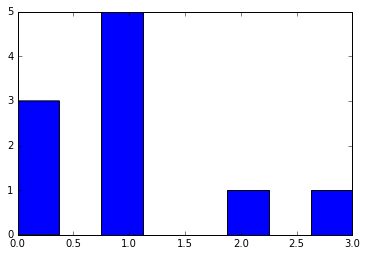

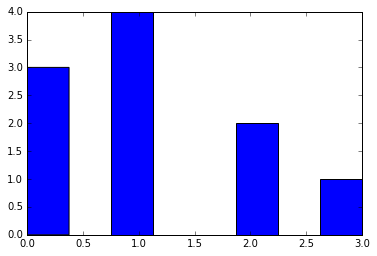

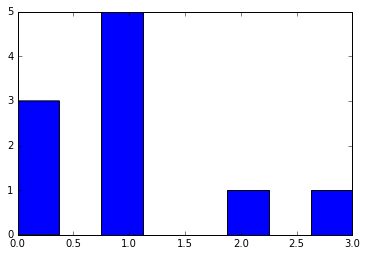

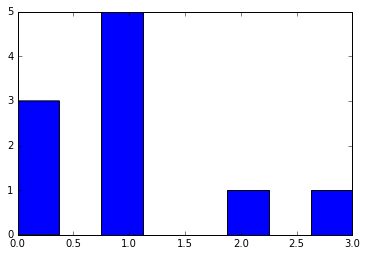

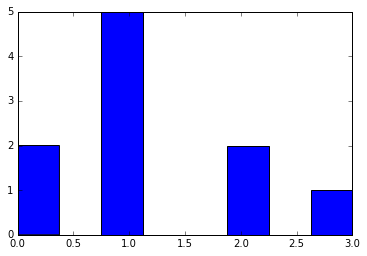

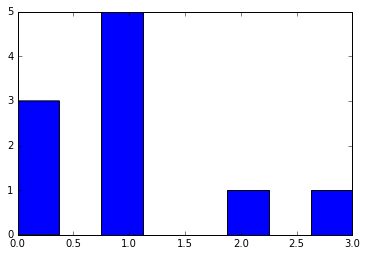

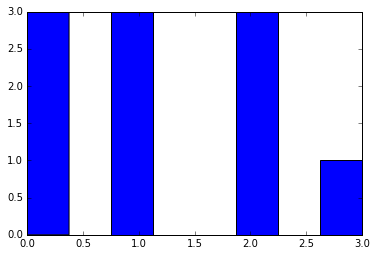

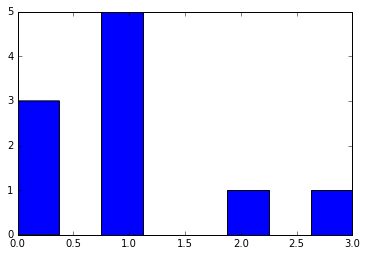

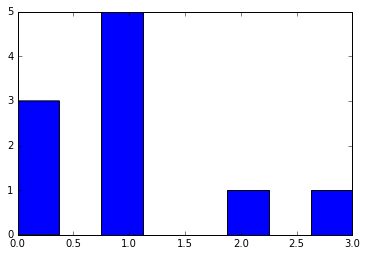

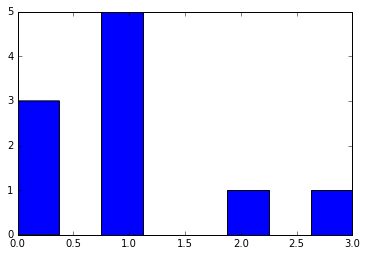

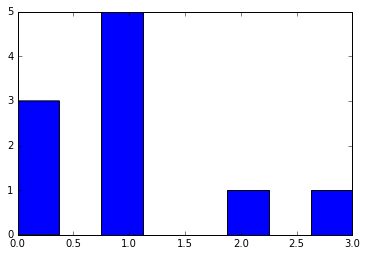

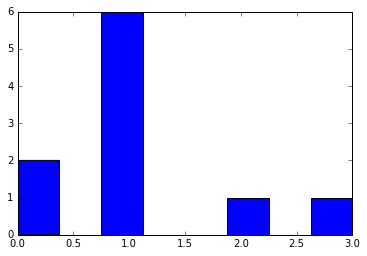

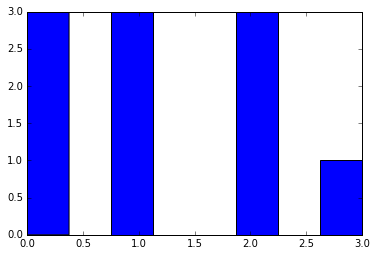

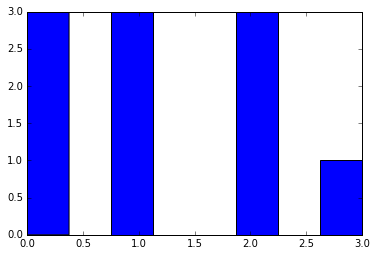

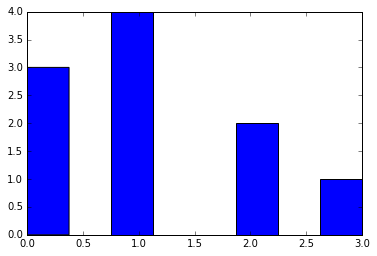

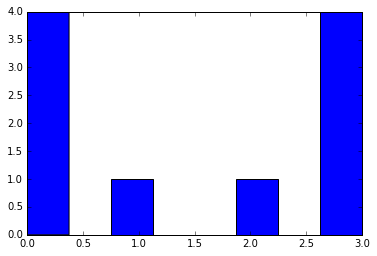

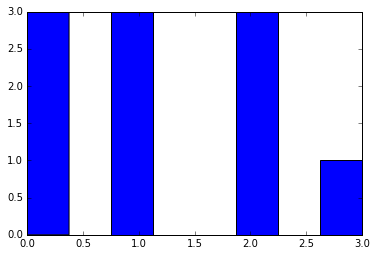

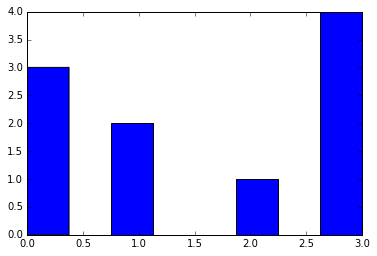

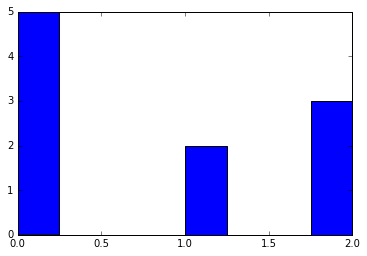

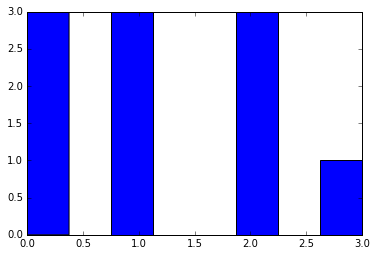

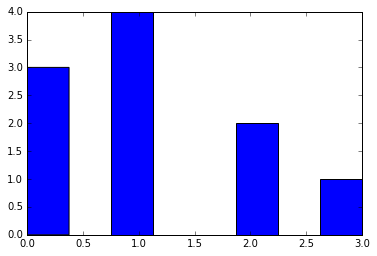

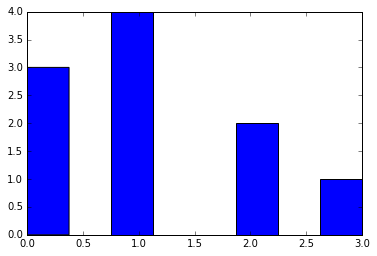

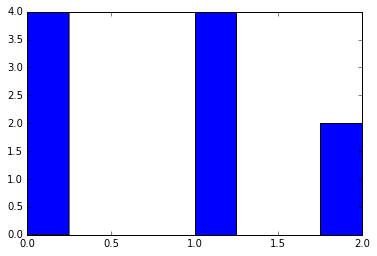

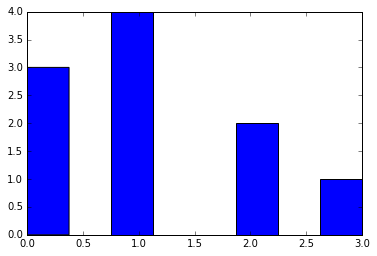

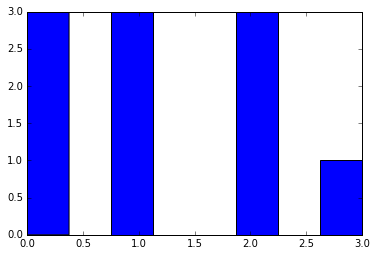

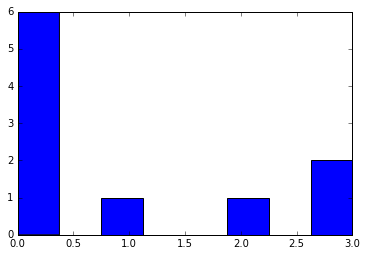

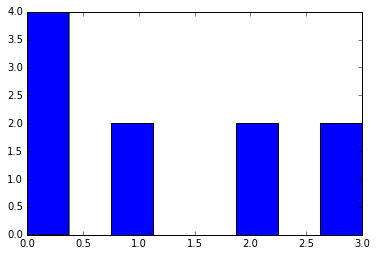

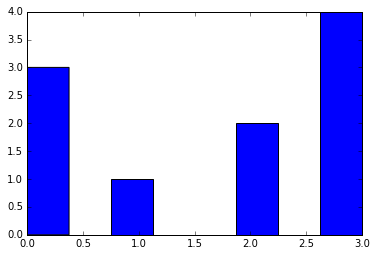

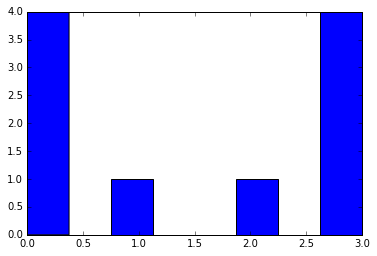

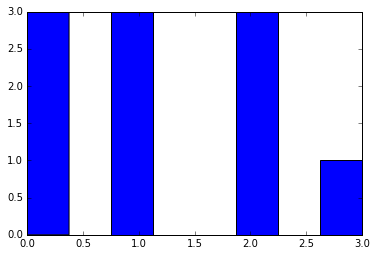

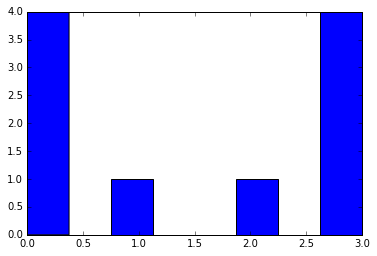

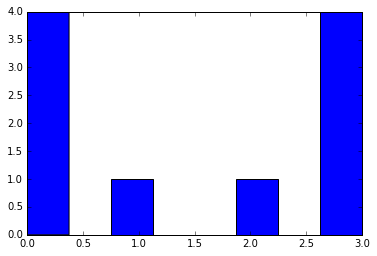

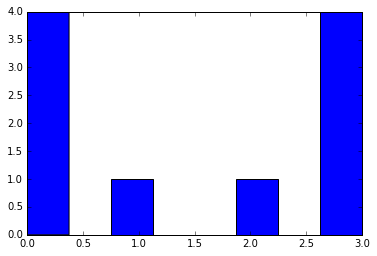

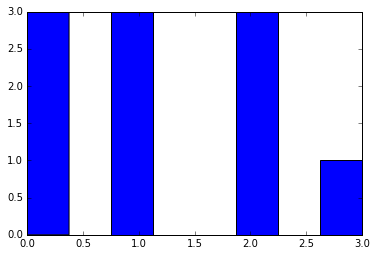

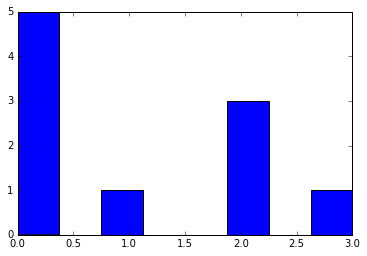

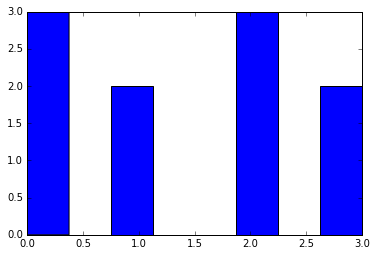

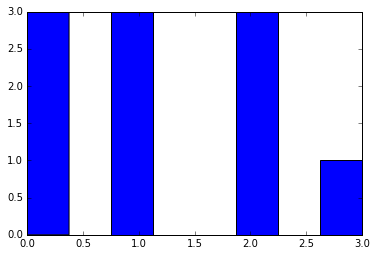

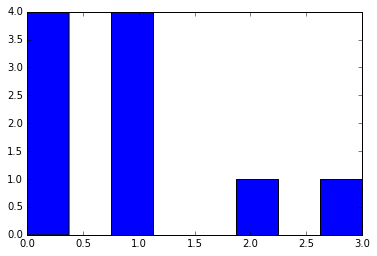

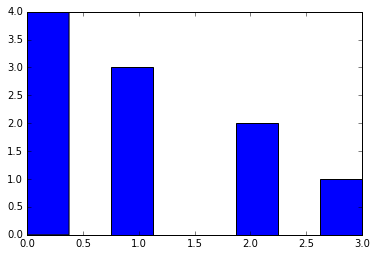

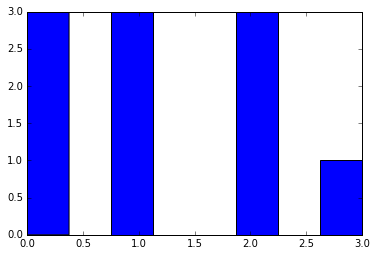

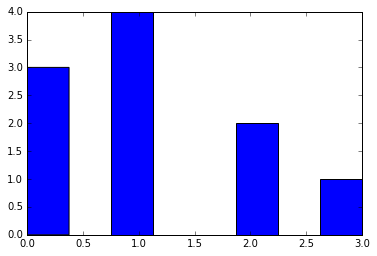

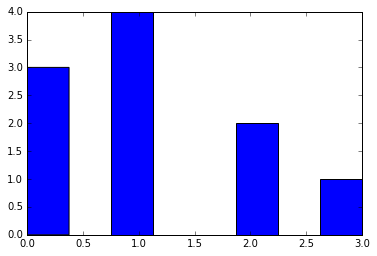

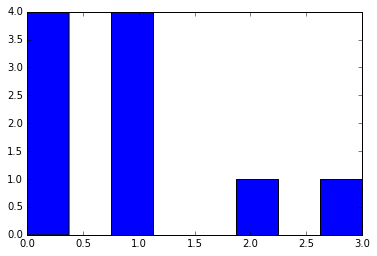

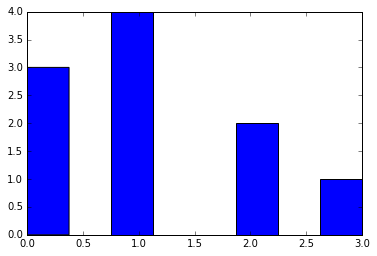

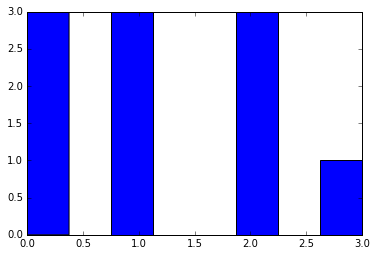

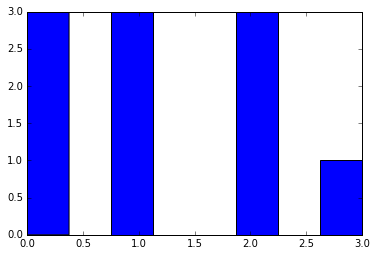

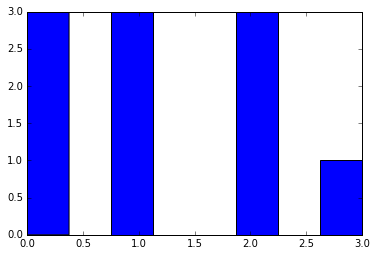

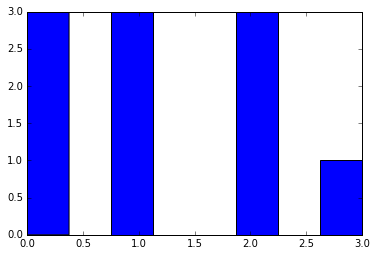

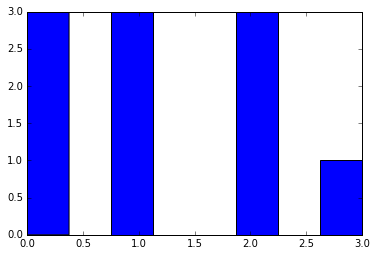

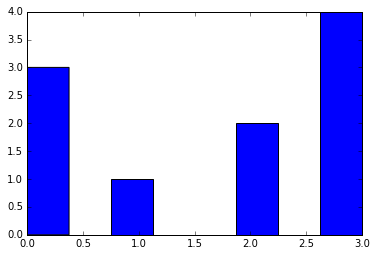

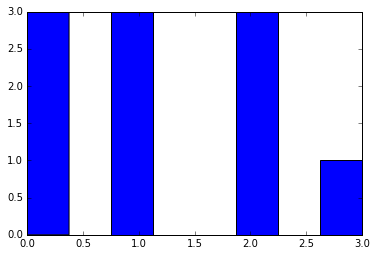

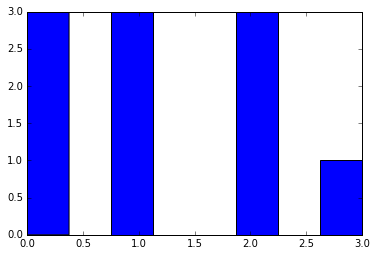

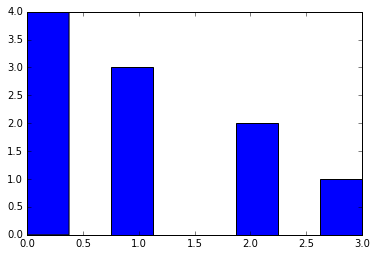

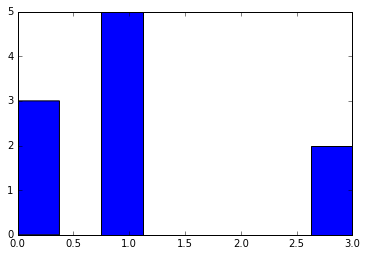

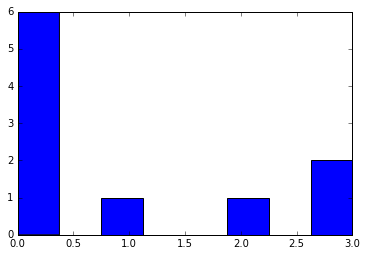

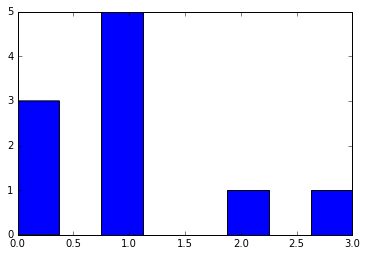

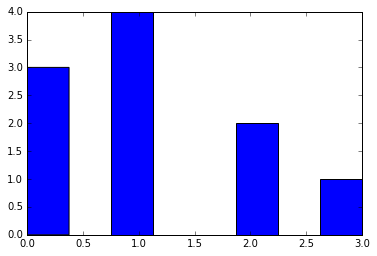

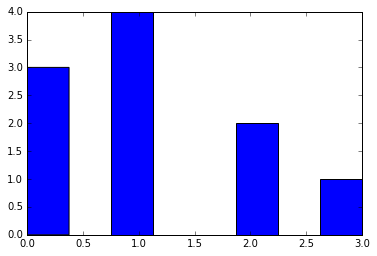

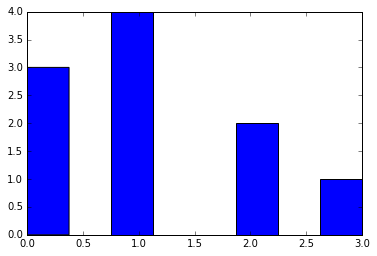

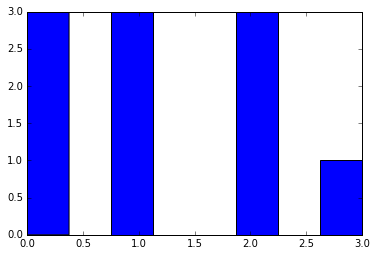

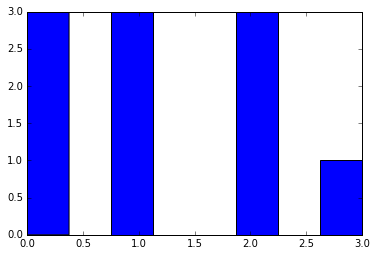

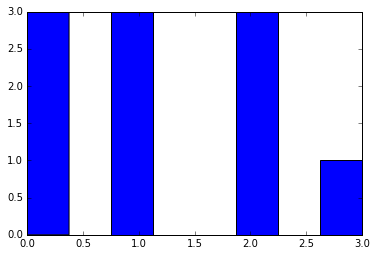

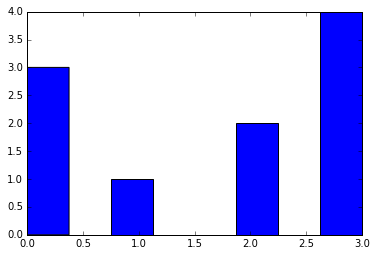

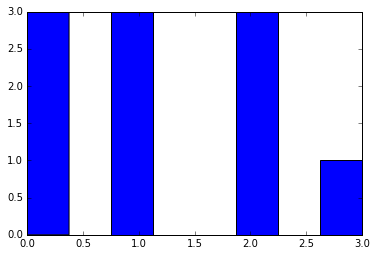

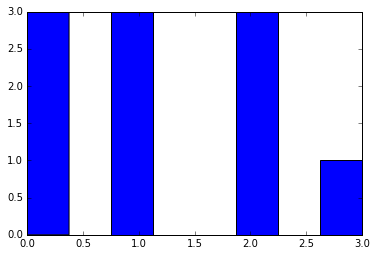

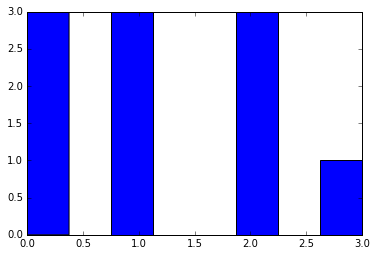

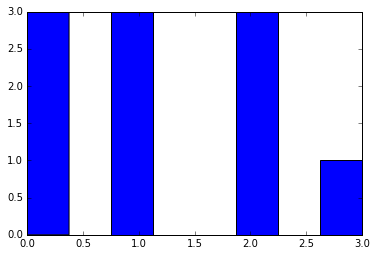

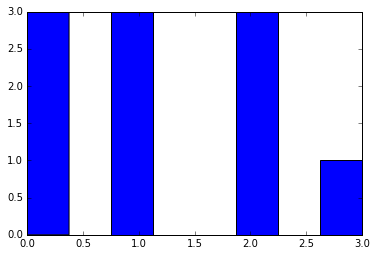

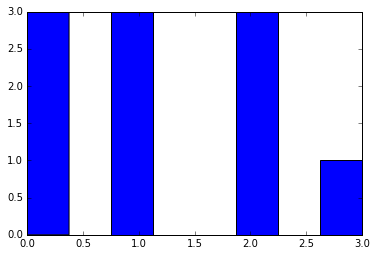

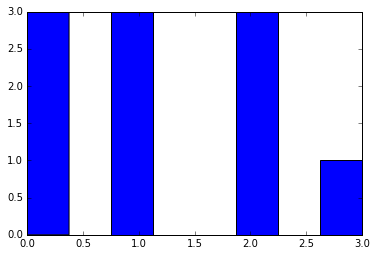

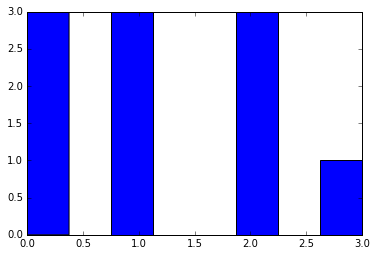

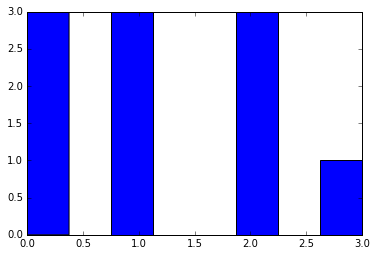

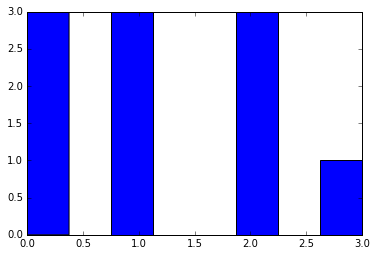

In [100]:
#A typical sewage treatment plant can be in 4 operation states, please refer to figure
#in the folder

%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

# Initializing dict to hold all possible cluster assignments
# for each row in the data set

d = {}
for i in range(df.shape[0]):
    d[i] = []
    
# We want to run Kmean random initialization of cluster centroids
# atleast 10 times

for i in range(10):
# Initializing Kmeans to 4 operational states
    model = KMeans(n_clusters=4)
# Note I'm scaling the data to normalize it! Important for good results.
    model = model.fit(scale(df))
# We can look at the clusters each data point was assigned to
# We also store the cluster each data point was assigned to in each iteration of K means
    for j in range(df.shape[0]):
        d[j].append(model.labels_[j]) 

# Optional: We plot a histogram of cluster assignments for each data point
for i in range(df.shape[0]):
    plt.hist(d[i], bins=8)
    plt.show()
   

In [101]:
import scipy.stats as mstats
for i in range(380):
    c,p = mstats.normaltest(d[i])
    if(p > 0.055):
        print i,"th row clustering is a normal distribution"

0 th row clustering is a normal distribution
1 th row clustering is a normal distribution
2 th row clustering is a normal distribution
4 th row clustering is a normal distribution
5 th row clustering is a normal distribution
6 th row clustering is a normal distribution
7 th row clustering is a normal distribution
8 th row clustering is a normal distribution
9 th row clustering is a normal distribution
10 th row clustering is a normal distribution
12 th row clustering is a normal distribution
13 th row clustering is a normal distribution
14 th row clustering is a normal distribution
15 th row clustering is a normal distribution
16 th row clustering is a normal distribution
17 th row clustering is a normal distribution
18 th row clustering is a normal distribution
19 th row clustering is a normal distribution
20 th row clustering is a normal distribution
21 th row clustering is a normal distribution
22 th row clustering is a normal distribution
23 th row clustering is a normal distributi

C:\Users\ajay\AppData\Local\Enthought\Canopy\User\lib\site-packages\scipy\stats\stats.py:1285: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
